This Python-code runs the Python program 'run_polymer_simulation_once.ipynb' many times to obtain better statistics. The quantities averaged quantities are written in 'quantities_averaged.dat'. The analysis (plots) is done by 'result_representation.ipynb'.

# Import of libraries 

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit
import datetime

# Set datetime and create subfolder for results

In [2]:
#set current date and time
DATETIME = datetime.datetime.now()
current_datetime = (str(DATETIME.year)+str(DATETIME.month)+str(DATETIME.day)+
                   str(DATETIME.hour)+str(DATETIME.minute)+str(DATETIME.second))

#create a folder for results (if not exists already)
try:
    os.makedirs("results")

except FileExistsError:
    #directory already exists
    pass

#create directory in folder 'results' to save results from every single simulation
os.makedirs("results/"+current_datetime)

In [3]:
#make short pathname for directory with results
path_results = "results/"+current_datetime+"/"

# Initialization and calculation of basic parameters

Initial parameters (fixed values for all simulation) are defined in the Initialization. Then, they are written to another python-file, 'init_parameters.ipynb'. The program 'run_polymer_simulation_once.ipynb' load this initial parameters from the file 'init_parameters.py' every time it is called. Attention: This extra file 'init_parameters.ipynb' is needed because a python program cannot load variables from this file ('main_code.ipynb') while it is run.

In [4]:
#define number of polymers segments (monomers)
Monomers = 50

#define number of bonds between segments
Bonds = Monomers - 1

#define spring constant (Rouse model) for bonds between segments in units energy/distance^2
k = 1

#define number of passive particles
n_passive_particles = 0

#define number of active particles
n_active_particles = 0

#define drag-coefficient constant gamma
gamma = 1

#define rest distance between segments
r0 = 0

#define temperature in units of kT
kT = 1

#define integration step time
dt = 10**(-4)

#define numer of point for graphical representation and used for fits (number of callbacks)
number_of_points = 1e3

In [5]:
#set epsilon and sigma for Lennard_jones potential between different particles
lj_epsilon_AA = 1.0
lj_sigma_AA = 1.0
lj_epsilon_AB = 0.01
lj_sigma_AB = 0.01
lj_epsilon_BB = 0.01
lj_sigma_BB = 0.01

#set cut-off radius for potential between two particles
r_cut = 2**(1/6)*lj_sigma_AA

In [6]:
#calculate Kuhn length b
Kuhn_length_b = math.sqrt(3*kT/k)

#calculate Rouse time (Rouse mode = 1)
tau_rouse_theory = gamma*Monomers**2*Kuhn_length_b**2 / (3*np.pi**2*kT)

In [7]:
#define number of integration steps (e3 --> *1000, is written into files in correct digit-format)
integration_steps = int(tau_rouse_theory/dt*10)

#set number of executions of one entire simulation
number_of_simulations = 100

#define maximum time
t_max = dt*integration_steps

Create file 'initial_values.py' and write the set parameters into it; this file is called every time when the simulation 'run_polymer_simulation_once.py' starts.

In [8]:
#write initial parameters in SAME directory as python-codes
file_init_parameters = open('initial_parameters.py', 'w')

init_parameters = (

    "current_datetime = "       +current_datetime+"\n"           +  
    "Monomers = "               +str(Monomers)+"\n"              +
    "Bonds = "                  +str(Bonds)+"\n"                 +
    "k = "                      +str(k)+"\n"                     +
    "n_passive_particles = "    +str(n_passive_particles)+"\n"   +
    "n_active_particles = "     +str(n_active_particles)+"\n"    +
    "lj_epsilon_AA = "          +str(lj_epsilon_AA)+"\n"         +
    "lj_sigma_AA = "            +str(lj_sigma_AA)+"\n"           +
    "lj_epsilon_AB = "          +str(lj_epsilon_AB)+"\n"         +
    "lj_sigma_AB = "            +str(lj_sigma_AB)+"\n"           +
    "lj_epsilon_BB = "          +str(lj_epsilon_BB)+"\n"         +
    "lj_sigma_BB = "            +str(lj_sigma_BB)+"\n"           +
    "r_cut = "                  +str(r_cut)+"\n"                 +
    "gamma = "                  +str(gamma)+"\n"                 +
    "r0 = "                     +str(r0)+"\n"                    +
    "kT = "                     +str(kT)+"\n"                    +
    "dt = "                     +str(dt)+"\n"                    +
    "integration_steps = "      +str(integration_steps)+"\n"     +
    "number_of_points = "       +str(number_of_points)+"\n"      +
    "number_of_simulations = "  +str(number_of_simulations)+"\n" +
    "Kuhn_length_b = "          +str(Kuhn_length_b)+"\n"         +
    "tau_rouse_theory = "       +str(tau_rouse_theory)+"\n"      +
    "t_max = "                  +str(t_max))

file_init_parameters.write(init_parameters)

file_init_parameters.close()


In [9]:
#save initial parameters also in 'results/current_datetime' directory as .py and as .dat

file_init_parameters = open(path_results+'initial_parameters.py', 'w')
file_init_parameters.write(init_parameters)
file_init_parameters.close()

file_init_parameters = open(path_results+'results.dat', 'w')
file_init_parameters.write(init_parameters)
file_init_parameters.close()

# Create empty file to safe simulated quantities and set every value to 0

In [10]:
#create empty file to called 'quantities_averaged.dat' to safe the simulated quantities
quantities_file = open(path_results+'quantities_averaged.dat', 'w')

for integration_step in range (0, int(number_of_points) + 5):
        
    #set all quantities to 0
    quantities_file.write('0	0	0	0\n')

#close the file
quantities_file.close()


# Run the entire simulation many times (using for-loop)

In [11]:
#run the entire simulation 'run_polymer_simulation_once.ipynb' many times
for run in range(number_of_simulations):
    
    #execute entire simulation
    print ("Step "+str(run+1)+" out of "+str(number_of_simulations))
    %run run_polymer_simulation_once.ipynb

Step 1 out of 100
HOOMD-blue 2.6.0 DOUBLE HPMC_MIXED TBB SSE SSE2 SSE3 
Compiled: 05/29/2019
Copyright (c) 2009-2019 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, C D Lorenz, and A Travesset. "General purpose molecular dynamics
  simulations fully implemented on graphics processing units", Journal of
  Computational Physics 227 (2008) 5342--5359
* J Glaser, T D Nguyen, J A Anderson, P Liu, F Spiga, J A Millan, D C Morse, and
  S C Glotzer. "Strong scaling of general-purpose molecular dynamics simulations
  on GPUs", Computer Physics Communications 192 (2015) 97--107
-----
HOOMD-blue is running on the CPU
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 1 exclusions             : 2
notice(2): Particles with 2 exclusions             : 48
notice(2): Neighbors included by

Time 00:17:20 | Step 20955132 / 25330295 | TPS 18420.4 | ETA 00:03:57
Time 00:17:30 | Step 21134901 / 25330295 | TPS 17976.2 | ETA 00:03:53
Time 00:17:40 | Step 21321220 / 25330295 | TPS 18631.7 | ETA 00:03:35
Time 00:17:50 | Step 21502760 / 25330295 | TPS 18143.9 | ETA 00:03:30
Time 00:18:00 | Step 21682155 / 25330295 | TPS 17939.4 | ETA 00:03:23
Time 00:18:10 | Step 21865513 / 25330295 | TPS 18332.4 | ETA 00:03:08
Time 00:18:20 | Step 22045568 / 25330295 | TPS 18005.5 | ETA 00:03:02
Time 00:18:30 | Step 22230613 / 25330295 | TPS 18499 | ETA 00:02:47
Time 00:18:40 | Step 22417051 / 25330295 | TPS 18630.4 | ETA 00:02:36
Time 00:18:50 | Step 22600701 / 25330295 | TPS 18364.8 | ETA 00:02:28
Time 00:19:00 | Step 22771888 / 25330295 | TPS 17118.5 | ETA 00:02:29
Time 00:19:10 | Step 22959840 / 25330295 | TPS 18793.9 | ETA 00:02:06
Time 00:19:20 | Step 23134901 / 25330295 | TPS 17502 | ETA 00:02:05
Time 00:19:30 | Step 23320061 / 25330295 | TPS 18515.7 | ETA 00:01:48
Time 00:19:40 | Step 235

Time 00:13:50 | Step 14154375 / 25330295 | TPS 15920.6 | ETA 00:11:41
Time 00:14:00 | Step 14341828 / 25330295 | TPS 18722.8 | ETA 00:09:46
Time 00:14:10 | Step 14525000 / 25330295 | TPS 18317.2 | ETA 00:09:49
Time 00:14:20 | Step 14697326 / 25330295 | TPS 17232.6 | ETA 00:10:17
Time 00:14:30 | Step 14862840 / 25330295 | TPS 16551.4 | ETA 00:10:32
Time 00:14:40 | Step 15037001 / 25330295 | TPS 17402.1 | ETA 00:09:51
Time 00:14:50 | Step 15211316 / 25330295 | TPS 17431.4 | ETA 00:09:40
Time 00:15:00 | Step 15380170 / 25330295 | TPS 16871.8 | ETA 00:09:49
Time 00:15:10 | Step 15546421 / 25330295 | TPS 16612 | ETA 00:09:48
Time 00:15:20 | Step 15728813 / 25330295 | TPS 18239.2 | ETA 00:08:46
Time 00:15:30 | Step 15897673 / 25330295 | TPS 16885.8 | ETA 00:09:18
Time 00:15:40 | Step 16071226 / 25330295 | TPS 17352.3 | ETA 00:08:53
Time 00:15:50 | Step 16242680 / 25330295 | TPS 17145.4 | ETA 00:08:50
Time 00:16:00 | Step 16408872 / 25330295 | TPS 16619.2 | ETA 00:08:56
Time 00:16:10 | Step 1

Time 00:07:20 | Step 8400448 / 25330295 | TPS 19364.6 | ETA 00:14:34
Time 00:07:30 | Step 8595225 / 25330295 | TPS 19476.4 | ETA 00:14:19
Time 00:07:40 | Step 8798401 / 25330295 | TPS 20317.3 | ETA 00:13:33
Time 00:07:50 | Step 8996395 / 25330295 | TPS 19799.4 | ETA 00:13:44
Time 00:08:00 | Step 9187038 / 25330295 | TPS 19064.2 | ETA 00:14:06
Time 00:08:10 | Step 9383340 / 25330295 | TPS 19624.2 | ETA 00:13:32
Time 00:08:20 | Step 9591285 / 25330295 | TPS 20790.3 | ETA 00:12:37
Time 00:08:30 | Step 9791330 / 25330295 | TPS 20001.9 | ETA 00:12:56
Time 00:08:40 | Step 9981062 / 25330295 | TPS 18973 | ETA 00:13:29
Time 00:08:50 | Step 10174605 / 25330295 | TPS 19353.2 | ETA 00:13:03
Time 00:09:00 | Step 10370722 / 25330295 | TPS 19601.9 | ETA 00:12:43
Time 00:09:10 | Step 10573414 / 25330295 | TPS 20269.2 | ETA 00:12:08
Time 00:09:20 | Step 10774483 / 25330295 | TPS 20094.9 | ETA 00:12:04
Time 00:09:30 | Step 10969316 / 25330295 | TPS 19483.3 | ETA 00:12:17
Time 00:09:40 | Step 11164285 /

Time 00:03:30 | Step 4145055 / 25330295 | TPS 19538.5 | ETA 00:18:04
Time 00:03:40 | Step 4350368 / 25330295 | TPS 20531.3 | ETA 00:17:01
Time 00:03:50 | Step 4552135 / 25330295 | TPS 20176.7 | ETA 00:17:09
Time 00:04:00 | Step 4749417 / 25330295 | TPS 19727.8 | ETA 00:17:23
Time 00:04:10 | Step 4948323 / 25330295 | TPS 19890 | ETA 00:17:04
Time 00:04:20 | Step 5068244 / 25330295 | TPS 11991.2 | ETA 00:28:09
Time 00:04:30 | Step 5182344 / 25330295 | TPS 11399.5 | ETA 00:29:27
Time 00:04:40 | Step 5297976 / 25330295 | TPS 11559.1 | ETA 00:28:53
Time 00:04:50 | Step 5412055 / 25330295 | TPS 11406.6 | ETA 00:29:06
Time 00:05:00 | Step 5528770 / 25330295 | TPS 11660 | ETA 00:28:18
Time 00:05:10 | Step 5639964 / 25330295 | TPS 11118.4 | ETA 00:29:30
Time 00:05:20 | Step 5756058 / 25330295 | TPS 11605.8 | ETA 00:28:06
Time 00:05:30 | Step 5874418 / 25330295 | TPS 11834.8 | ETA 00:27:23
Time 00:05:40 | Step 5993624 / 25330295 | TPS 11912.2 | ETA 00:27:03
Time 00:05:50 | Step 6111734 / 2533029

Time 00:23:20 | Step 22858998 / 25330295 | TPS 19020.2 | ETA 00:02:09
Time 00:23:30 | Step 23054160 / 25330295 | TPS 19516.2 | ETA 00:01:56
Time 00:23:40 | Step 23245927 / 25330295 | TPS 19166.4 | ETA 00:01:48
Time 00:23:50 | Step 23438292 / 25330295 | TPS 19231.6 | ETA 00:01:38
Time 00:24:00 | Step 23643918 / 25330295 | TPS 20557.7 | ETA 00:01:22
Time 00:24:10 | Step 23842590 / 25330295 | TPS 19856 | ETA 00:01:14
Time 00:24:20 | Step 24019974 / 25330295 | TPS 17731.3 | ETA 00:01:13
Time 00:24:30 | Step 24192377 / 25330295 | TPS 17237.1 | ETA 00:01:06
Time 00:24:40 | Step 24378057 / 25330295 | TPS 18547.2 | ETA 00:00:51
Time 00:24:50 | Step 24561566 / 25330295 | TPS 18334.5 | ETA 00:00:41
Time 00:25:00 | Step 24750484 / 25330295 | TPS 18891.8 | ETA 00:00:30
Time 00:25:10 | Step 24925711 / 25330295 | TPS 17522.7 | ETA 00:00:23
Time 00:25:20 | Step 25110258 / 25330295 | TPS 18436.4 | ETA 00:00:11
Time 00:25:30 | Step 25298512 / 25330295 | TPS 18808.3 | ETA 00:00:01
Time 00:25:32 | Step 2

Time 00:15:40 | Step 17624955 / 25330295 | TPS 19175.3 | ETA 00:06:41
Time 00:15:50 | Step 17822901 / 25330295 | TPS 19790.6 | ETA 00:06:19
Time 00:16:00 | Step 18022796 / 25330295 | TPS 19973.9 | ETA 00:06:05
Time 00:16:10 | Step 18219738 / 25330295 | TPS 19694.1 | ETA 00:06:01
Time 00:16:20 | Step 18407201 / 25330295 | TPS 18746.1 | ETA 00:06:09
Time 00:16:30 | Step 18610277 / 25330295 | TPS 20287.6 | ETA 00:05:31
Time 00:16:40 | Step 18812996 / 25330295 | TPS 20271.8 | ETA 00:05:21
Time 00:16:50 | Step 19006831 / 25330295 | TPS 19370.1 | ETA 00:05:26
Time 00:17:00 | Step 19203939 / 25330295 | TPS 19710.7 | ETA 00:05:10
Time 00:17:10 | Step 19407539 / 25330295 | TPS 20360 | ETA 00:04:50
Time 00:17:20 | Step 19607200 / 25330295 | TPS 19965.9 | ETA 00:04:46
Time 00:17:30 | Step 19807558 / 25330295 | TPS 20034.1 | ETA 00:04:35
Time 00:17:40 | Step 20003762 / 25330295 | TPS 19620.4 | ETA 00:04:31
Time 00:17:50 | Step 20191350 / 25330295 | TPS 18758.4 | ETA 00:04:33
Time 00:18:00 | Step 2

Time 00:11:10 | Step 13738720 / 25330295 | TPS 20467.2 | ETA 00:09:26
Time 00:11:20 | Step 13946221 / 25330295 | TPS 20750 | ETA 00:09:08
Time 00:11:30 | Step 14157290 / 25330295 | TPS 21106.9 | ETA 00:08:49
Time 00:11:40 | Step 14369877 / 25330295 | TPS 21237.8 | ETA 00:08:36
Time 00:11:50 | Step 14568949 / 25330295 | TPS 19907.2 | ETA 00:09:00
Time 00:12:00 | Step 14791190 / 25330295 | TPS 22224.1 | ETA 00:07:54
Time 00:12:10 | Step 15023821 / 25330295 | TPS 23263 | ETA 00:07:23
Time 00:12:20 | Step 15228020 / 25330295 | TPS 20416.6 | ETA 00:08:14
Time 00:12:30 | Step 15428514 / 25330295 | TPS 20049.4 | ETA 00:08:13
Time 00:12:40 | Step 15623703 / 25330295 | TPS 19518.9 | ETA 00:08:17
Time 00:12:50 | Step 15830482 / 25330295 | TPS 20671.1 | ETA 00:07:39
Time 00:13:00 | Step 16038660 / 25330295 | TPS 20813.8 | ETA 00:07:26
Time 00:13:10 | Step 16235433 / 25330295 | TPS 19677.3 | ETA 00:07:42
Time 00:13:20 | Step 16466755 / 25330295 | TPS 23122.2 | ETA 00:06:23
Time 00:13:30 | Step 166

Time 00:08:40 | Step 10546244 / 25330295 | TPS 21117.5 | ETA 00:11:40
Time 00:08:50 | Step 10737677 / 25330295 | TPS 19142.8 | ETA 00:12:42
Time 00:09:00 | Step 10935094 / 25330295 | TPS 19741.7 | ETA 00:12:09
Time 00:09:10 | Step 11119818 / 25330295 | TPS 18472.4 | ETA 00:12:49
Time 00:09:20 | Step 11282060 / 25330295 | TPS 16224.2 | ETA 00:14:25
Time 00:09:30 | Step 11456801 / 25330295 | TPS 17473.6 | ETA 00:13:13
Time 00:09:40 | Step 11628513 / 25330295 | TPS 17156 | ETA 00:13:18
Time 00:09:50 | Step 11829367 / 25330295 | TPS 20085.4 | ETA 00:11:12
Time 00:10:00 | Step 12053161 / 25330295 | TPS 22379.4 | ETA 00:09:53
Time 00:10:10 | Step 12245000 / 25330295 | TPS 19183.9 | ETA 00:11:22
Time 00:10:20 | Step 12410117 / 25330295 | TPS 16510.7 | ETA 00:13:02
Time 00:10:30 | Step 12586833 / 25330295 | TPS 17665.4 | ETA 00:12:01
Time 00:10:40 | Step 12803473 / 25330295 | TPS 21663.9 | ETA 00:09:38
Time 00:10:50 | Step 13046992 / 25330295 | TPS 24351.9 | ETA 00:08:24
Time 00:11:00 | Step 1

Time 00:05:40 | Step 6894290 / 25330295 | TPS 19726 | ETA 00:15:34
Time 00:05:50 | Step 7087633 / 25330295 | TPS 19314.6 | ETA 00:15:44
Time 00:06:00 | Step 7279691 / 25330295 | TPS 19205.8 | ETA 00:15:39
Time 00:06:10 | Step 7485269 / 25330295 | TPS 20557.7 | ETA 00:14:28
Time 00:06:20 | Step 7694702 / 25330295 | TPS 20943.3 | ETA 00:14:02
Time 00:06:30 | Step 7887461 / 25330295 | TPS 19273.1 | ETA 00:15:05
Time 00:06:40 | Step 8100877 / 25330295 | TPS 21321.7 | ETA 00:13:28
Time 00:06:50 | Step 8316083 / 25330295 | TPS 21503.4 | ETA 00:13:11
Time 00:07:00 | Step 8515628 / 25330295 | TPS 19947.7 | ETA 00:14:02
Time 00:07:10 | Step 8726288 / 25330295 | TPS 21066 | ETA 00:13:08
Time 00:07:20 | Step 8946785 / 25330295 | TPS 22049.5 | ETA 00:12:23
Time 00:07:30 | Step 9148838 / 25330295 | TPS 20200.5 | ETA 00:13:21
Time 00:07:40 | Step 9352419 / 25330295 | TPS 20348.5 | ETA 00:13:05
Time 00:07:50 | Step 9564312 / 25330295 | TPS 21180.1 | ETA 00:12:24
Time 00:08:00 | Step 9747701 / 2533029

Time 00:03:30 | Step 4485978 / 25330295 | TPS 22597.4 | ETA 00:15:22
Time 00:03:40 | Step 4693232 / 25330295 | TPS 20725.4 | ETA 00:16:35
Time 00:03:50 | Step 4893180 / 25330295 | TPS 19984.9 | ETA 00:17:02
Time 00:04:00 | Step 5102722 / 25330295 | TPS 20954.1 | ETA 00:16:05
Time 00:04:10 | Step 5316064 / 25330295 | TPS 21325.7 | ETA 00:15:38
Time 00:04:20 | Step 5520621 / 25330295 | TPS 20455.7 | ETA 00:16:08
Time 00:04:30 | Step 5730727 / 25330295 | TPS 20989.8 | ETA 00:15:33
Time 00:04:40 | Step 5941183 / 25330295 | TPS 21030.6 | ETA 00:15:21
Time 00:04:50 | Step 6147817 / 25330295 | TPS 20653.1 | ETA 00:15:28
Time 00:05:00 | Step 6353341 / 25330295 | TPS 20540.3 | ETA 00:15:23
Time 00:05:10 | Step 6567629 / 25330295 | TPS 21409.5 | ETA 00:14:36
Time 00:05:20 | Step 6786108 / 25330295 | TPS 21847.9 | ETA 00:14:08
Time 00:05:30 | Step 6987221 / 25330295 | TPS 20093.2 | ETA 00:15:12
Time 00:05:40 | Step 7192729 / 25330295 | TPS 20548.7 | ETA 00:14:42
Time 00:05:50 | Step 7402431 / 253

Time 00:01:10 | Step 1493549 / 25330295 | TPS 19581.2 | ETA 00:20:17
Time 00:01:20 | Step 1671862 / 25330295 | TPS 17831.2 | ETA 00:22:06
Time 00:01:30 | Step 1882571 / 25330295 | TPS 21059.9 | ETA 00:18:33
Time 00:01:40 | Step 2132601 / 25330295 | TPS 25002.6 | ETA 00:15:27
Time 00:01:50 | Step 2359475 / 25330295 | TPS 22687.4 | ETA 00:16:52
Time 00:02:00 | Step 2571759 / 25330295 | TPS 21220.9 | ETA 00:17:52
Time 00:02:10 | Step 2779955 / 25330295 | TPS 20806.8 | ETA 00:18:03
Time 00:02:20 | Step 2994696 / 25330295 | TPS 21474.1 | ETA 00:17:20
Time 00:02:30 | Step 3205826 / 25330295 | TPS 21094.4 | ETA 00:17:28
Time 00:02:40 | Step 3401594 / 25330295 | TPS 19576.6 | ETA 00:18:40
Time 00:02:50 | Step 3620701 / 25330295 | TPS 21910.6 | ETA 00:16:30
Time 00:03:00 | Step 3844239 / 25330295 | TPS 22340.7 | ETA 00:16:01
Time 00:03:10 | Step 4053601 / 25330295 | TPS 20936.2 | ETA 00:16:56
Time 00:03:20 | Step 4283043 / 25330295 | TPS 22944.2 | ETA 00:15:17
Time 00:03:30 | Step 4487817 / 253

Time 00:00:30 | Step 648450 / 25330295 | TPS 23563.4 | ETA 00:17:27
Time 00:00:40 | Step 920381 / 25330295 | TPS 27191.1 | ETA 00:14:57
Time 00:00:50 | Step 1129349 / 25330295 | TPS 20895.9 | ETA 00:19:18
Time 00:01:00 | Step 1381682 / 25330295 | TPS 25233 | ETA 00:15:49
Time 00:01:10 | Step 1614512 / 25330295 | TPS 23264.7 | ETA 00:16:59
Time 00:01:20 | Step 1852522 / 25330295 | TPS 23789.9 | ETA 00:16:26
Time 00:01:30 | Step 2093280 / 25330295 | TPS 24075.8 | ETA 00:16:05
Time 00:01:40 | Step 2332237 / 25330295 | TPS 23895.5 | ETA 00:16:02
Time 00:01:50 | Step 2568221 / 25330295 | TPS 23587.5 | ETA 00:16:05
Time 00:02:00 | Step 2813908 / 25330295 | TPS 24537.8 | ETA 00:15:17
Time 00:02:10 | Step 3048366 / 25330295 | TPS 23445.7 | ETA 00:15:50
Time 00:02:20 | Step 3285782 / 25330295 | TPS 23725.8 | ETA 00:15:29
Time 00:02:30 | Step 3528034 / 25330295 | TPS 24225.1 | ETA 00:14:59
Time 00:02:40 | Step 3750572 / 25330295 | TPS 22247.7 | ETA 00:16:09
Time 00:02:50 | Step 3974638 / 2533029

Dimension: 98, 98, 98
n_min    : 0 / n_max: 3 / n_avg: 5.31241e-05
** run complete **
Step 12 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 1 exclusions             : 2
notice(2): Particles with 2 exclusions             : 48
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no
** starting run **
Time 00:00:10 | Step 116454 / 25330295 | TPS 11645 | ETA 00:36:05
Time 00:00:20 | Step 250514 / 25330295 | TPS 13405.5 | ETA 00:31:10
Time 00:00:30 | Step 373392 / 25330295 | TPS 12287.5 | ETA 00:33:51
Time 00:00:40 | Step 523559 / 25330295 | TPS 15007.9 | ETA 00:27:32
Time 00:00:50 | Step 658216 / 25330295 | TPS 13461.1 | ETA 00:30:32
Time 00:01:00 | Step 798842 / 25330295 | TPS 14061.8 | ETA 00:29:04
Time 00:01:10 | Step 935340 / 25330295 | TPS 13644.3 | ETA 00:29:47
Time 0

Time 00:18:50 | Step 22996217 / 25330295 | TPS 23231.6 | ETA 00:01:40
Time 00:19:00 | Step 23214701 / 25330295 | TPS 21848.1 | ETA 00:01:36
Time 00:19:10 | Step 23432920 / 25330295 | TPS 21818.9 | ETA 00:01:26
Time 00:19:20 | Step 23653740 / 25330295 | TPS 22081.7 | ETA 00:01:15
Time 00:19:30 | Step 23893701 / 25330295 | TPS 23996 | ETA 00:00:59
Time 00:19:40 | Step 24126844 / 25330295 | TPS 23314.3 | ETA 00:00:51
Time 00:19:50 | Step 24361001 / 25330295 | TPS 23415.7 | ETA 00:00:41
Time 00:20:00 | Step 24588520 / 25330295 | TPS 22751.9 | ETA 00:00:32
Time 00:20:10 | Step 24816502 / 25330295 | TPS 22798.2 | ETA 00:00:22
Time 00:20:20 | Step 25051331 / 25330295 | TPS 23482.9 | ETA 00:00:11
Time 00:20:30 | Step 25273594 / 25330295 | TPS 22226 | ETA 00:00:02
Time 00:20:32 | Step 25330295 / 25330295 | TPS 23608 | ETA 00:00:00
Average TPS: 20549.6
---------
-- Neighborlist stats:
1211840 normal updates / 253303 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 1 / n_neigh_a

Time 00:16:10 | Step 15646668 / 25330295 | TPS 23617.4 | ETA 00:06:50
Time 00:16:20 | Step 15885369 / 25330295 | TPS 23869.4 | ETA 00:06:35
Time 00:16:30 | Step 16105201 / 25330295 | TPS 21983.1 | ETA 00:06:59
Time 00:16:40 | Step 16337735 / 25330295 | TPS 23253.2 | ETA 00:06:26
Time 00:16:50 | Step 16599321 / 25330295 | TPS 26146.9 | ETA 00:05:33
Time 00:17:00 | Step 16837444 / 25330295 | TPS 23812.2 | ETA 00:05:56
Time 00:17:10 | Step 17070276 / 25330295 | TPS 23283.2 | ETA 00:05:54
Time 00:17:20 | Step 17315460 / 25330295 | TPS 24506.2 | ETA 00:05:27
Time 00:17:30 | Step 17560735 / 25330295 | TPS 24527.5 | ETA 00:05:16
Time 00:17:40 | Step 17790697 / 25330295 | TPS 22996.2 | ETA 00:05:27
Time 00:17:50 | Step 18037409 / 25330295 | TPS 24671.2 | ETA 00:04:55
Time 00:18:00 | Step 18284560 / 25330295 | TPS 24715.1 | ETA 00:04:45
Time 00:18:10 | Step 18509590 / 25330295 | TPS 22503 | ETA 00:05:03
Time 00:18:20 | Step 18737421 / 25330295 | TPS 22783.1 | ETA 00:04:49
Time 00:18:30 | Step 1

Time 00:11:10 | Step 13599001 / 25330295 | TPS 16651.4 | ETA 00:11:44
Time 00:11:20 | Step 13796500 / 25330295 | TPS 19749.9 | ETA 00:09:43
Time 00:11:30 | Step 13986600 / 25330295 | TPS 18998.7 | ETA 00:09:57
Time 00:11:40 | Step 14168075 / 25330295 | TPS 18147.5 | ETA 00:10:15
Time 00:11:50 | Step 14347301 / 25330295 | TPS 17922.6 | ETA 00:10:12
Time 00:12:00 | Step 14519506 / 25330295 | TPS 17218.2 | ETA 00:10:27
Time 00:12:10 | Step 14721481 / 25330295 | TPS 20197.1 | ETA 00:08:45
Time 00:12:20 | Step 14908565 / 25330295 | TPS 18708.4 | ETA 00:09:17
Time 00:12:30 | Step 15098239 / 25330295 | TPS 18957 | ETA 00:08:59
Time 00:12:40 | Step 15282933 / 25330295 | TPS 18453 | ETA 00:09:04
Time 00:12:50 | Step 15454350 / 25330295 | TPS 17141.7 | ETA 00:09:36
Time 00:13:00 | Step 15684684 / 25330295 | TPS 23033.4 | ETA 00:06:58
Time 00:13:10 | Step 15910501 / 25330295 | TPS 22581.7 | ETA 00:06:57
Time 00:13:20 | Step 16140214 / 25330295 | TPS 22971 | ETA 00:06:40
Time 00:13:30 | Step 16354

Time 00:09:00 | Step 11399431 / 25330295 | TPS 20525.2 | ETA 00:11:18
Time 00:09:10 | Step 11619269 / 25330295 | TPS 21980.1 | ETA 00:10:23
Time 00:09:20 | Step 11834548 / 25330295 | TPS 21521.9 | ETA 00:10:27
Time 00:09:30 | Step 12029795 / 25330295 | TPS 19521.1 | ETA 00:11:21
Time 00:09:40 | Step 12217796 / 25330295 | TPS 18783.2 | ETA 00:11:38
Time 00:09:50 | Step 12427001 / 25330295 | TPS 20908.8 | ETA 00:10:17
Time 00:10:00 | Step 12621981 / 25330295 | TPS 19478.7 | ETA 00:10:52
Time 00:10:10 | Step 12821951 / 25330295 | TPS 19992.8 | ETA 00:10:25
Time 00:10:20 | Step 13024991 / 25330295 | TPS 20302.9 | ETA 00:10:06
Time 00:10:30 | Step 13237655 / 25330295 | TPS 21266.4 | ETA 00:09:28
Time 00:10:40 | Step 13451642 / 25330295 | TPS 21398.7 | ETA 00:09:15
Time 00:10:50 | Step 13659101 / 25330295 | TPS 20745.6 | ETA 00:09:22
Time 00:11:00 | Step 13854702 / 25330295 | TPS 19560.1 | ETA 00:09:46
Time 00:11:10 | Step 14059004 / 25330295 | TPS 20430.2 | ETA 00:09:11
Time 00:11:20 | Step

Time 00:07:20 | Step 9526524 / 25330295 | TPS 20418.5 | ETA 00:12:53
Time 00:07:30 | Step 9715933 / 25330295 | TPS 18940.9 | ETA 00:13:44
Time 00:07:40 | Step 9935501 / 25330295 | TPS 21955.7 | ETA 00:11:41
Time 00:07:50 | Step 10124389 / 25330295 | TPS 18888.8 | ETA 00:13:25
Time 00:08:00 | Step 10337401 / 25330295 | TPS 21300.4 | ETA 00:11:43
Time 00:08:10 | Step 10545866 / 25330295 | TPS 20844.5 | ETA 00:11:49
Time 00:08:20 | Step 10742701 / 25330295 | TPS 19681.4 | ETA 00:12:21
Time 00:08:30 | Step 10954021 / 25330295 | TPS 21132 | ETA 00:11:20
Time 00:08:40 | Step 11177231 / 25330295 | TPS 22320.4 | ETA 00:10:34
Time 00:08:50 | Step 11387094 / 25330295 | TPS 20986.3 | ETA 00:11:04
Time 00:09:00 | Step 11612913 / 25330295 | TPS 22581.9 | ETA 00:10:07
Time 00:09:10 | Step 11815437 / 25330295 | TPS 20251.9 | ETA 00:11:07
Time 00:09:20 | Step 12018863 / 25330295 | TPS 20340.8 | ETA 00:10:54
Time 00:09:30 | Step 12224361 / 25330295 | TPS 20549.8 | ETA 00:10:37
Time 00:09:40 | Step 1243

Time 00:07:00 | Step 11132150 / 25330295 | TPS 27861.6 | ETA 00:08:29
Time 00:07:10 | Step 11390861 / 25330295 | TPS 25870.5 | ETA 00:08:58
Time 00:07:20 | Step 11656280 / 25330295 | TPS 26541.9 | ETA 00:08:35
Time 00:07:30 | Step 11943681 / 25330295 | TPS 28739.4 | ETA 00:07:45
Time 00:07:40 | Step 12210187 / 25330295 | TPS 26627.3 | ETA 00:08:12
Time 00:07:50 | Step 12480965 / 25330295 | TPS 27077.8 | ETA 00:07:54
Time 00:08:00 | Step 12741766 / 25330295 | TPS 26080.1 | ETA 00:08:02
Time 00:08:10 | Step 12992898 / 25330295 | TPS 25113.1 | ETA 00:08:11
Time 00:08:20 | Step 13256013 / 25330295 | TPS 26311.5 | ETA 00:07:38
Time 00:08:30 | Step 13515281 / 25330295 | TPS 25926.4 | ETA 00:07:35
Time 00:08:40 | Step 13781933 / 25330295 | TPS 26665.2 | ETA 00:07:13
Time 00:08:50 | Step 14053034 / 25330295 | TPS 27110.1 | ETA 00:06:55
Time 00:09:00 | Step 14322800 / 25330295 | TPS 26976.6 | ETA 00:06:48
Time 00:09:10 | Step 14593899 / 25330295 | TPS 27109.9 | ETA 00:06:36
Time 00:09:20 | Step

Time 00:08:50 | Step 13549983 / 25330295 | TPS 25884.7 | ETA 00:07:35
Time 00:09:00 | Step 13797537 / 25330295 | TPS 24730.6 | ETA 00:07:46
Time 00:09:10 | Step 14058172 / 25330295 | TPS 26063.5 | ETA 00:07:12
Time 00:09:20 | Step 14314517 / 25330295 | TPS 25632.9 | ETA 00:07:09
Time 00:09:30 | Step 14566566 / 25330295 | TPS 25204.7 | ETA 00:07:07
Time 00:09:40 | Step 14813910 / 25330295 | TPS 24716.2 | ETA 00:07:05
Time 00:09:50 | Step 15050352 / 25330295 | TPS 23623.1 | ETA 00:07:15
Time 00:10:00 | Step 15310044 / 25330295 | TPS 25948.4 | ETA 00:06:26
Time 00:10:10 | Step 15561838 / 25330295 | TPS 25178.8 | ETA 00:06:27
Time 00:10:20 | Step 15821501 / 25330295 | TPS 25966 | ETA 00:06:06
Time 00:10:30 | Step 16096681 / 25330295 | TPS 27518 | ETA 00:05:35
Time 00:10:40 | Step 16354018 / 25330295 | TPS 25733.6 | ETA 00:05:48
Time 00:10:50 | Step 16613816 / 25330295 | TPS 25977.6 | ETA 00:05:35
Time 00:11:00 | Step 16863401 / 25330295 | TPS 24958.4 | ETA 00:05:39
Time 00:11:10 | Step 171

Time 00:10:20 | Step 14613741 / 25330295 | TPS 23397.5 | ETA 00:07:38
Time 00:10:30 | Step 14837720 / 25330295 | TPS 22397.9 | ETA 00:07:48
Time 00:10:40 | Step 15080029 / 25330295 | TPS 24230.9 | ETA 00:07:03
Time 00:10:50 | Step 15306318 / 25330295 | TPS 22628.3 | ETA 00:07:22
Time 00:11:00 | Step 15547921 / 25330295 | TPS 24160.1 | ETA 00:06:44
Time 00:11:10 | Step 15764276 / 25330295 | TPS 21632.2 | ETA 00:07:22
Time 00:11:20 | Step 15983467 / 25330295 | TPS 21916.9 | ETA 00:07:06
Time 00:11:30 | Step 16219431 / 25330295 | TPS 23596.4 | ETA 00:06:26
Time 00:11:40 | Step 16459395 / 25330295 | TPS 23995.6 | ETA 00:06:09
Time 00:11:50 | Step 16676921 / 25330295 | TPS 21751 | ETA 00:06:37
Time 00:12:00 | Step 16897873 / 25330295 | TPS 22095 | ETA 00:06:21
Time 00:12:10 | Step 17132435 / 25330295 | TPS 23446.4 | ETA 00:05:49
Time 00:12:20 | Step 17360131 / 25330295 | TPS 22769.5 | ETA 00:05:50
Time 00:12:30 | Step 17596418 / 25330295 | TPS 23626.9 | ETA 00:05:27
Time 00:12:40 | Step 178

Time 00:10:50 | Step 16853417 / 25330295 | TPS 26045.6 | ETA 00:05:25
Time 00:11:00 | Step 17126886 / 25330295 | TPS 27335.4 | ETA 00:05:00
Time 00:11:10 | Step 17388638 / 25330295 | TPS 26175.1 | ETA 00:05:03
Time 00:11:20 | Step 17661027 / 25330295 | TPS 27221.1 | ETA 00:04:41
Time 00:11:30 | Step 17914572 / 25330295 | TPS 25354.5 | ETA 00:04:52
Time 00:11:40 | Step 18180278 / 25330295 | TPS 26570.2 | ETA 00:04:29
Time 00:11:50 | Step 18434897 / 25330295 | TPS 25461.9 | ETA 00:04:30
Time 00:12:00 | Step 18703295 / 25330295 | TPS 26839.4 | ETA 00:04:06
Time 00:12:10 | Step 18965961 / 25330295 | TPS 26260.9 | ETA 00:04:02
Time 00:12:20 | Step 19226733 / 25330295 | TPS 26077.2 | ETA 00:03:54
Time 00:12:30 | Step 19490974 / 25330295 | TPS 26424 | ETA 00:03:40
Time 00:12:40 | Step 19764756 / 25330295 | TPS 27378.2 | ETA 00:03:23
Time 00:12:50 | Step 20014938 / 25330295 | TPS 24999.6 | ETA 00:03:32
Time 00:13:00 | Step 20278048 / 25330295 | TPS 26269 | ETA 00:03:12
Time 00:13:10 | Step 205

Time 00:12:30 | Step 19351675 / 25330295 | TPS 24122.2 | ETA 00:04:07
Time 00:12:40 | Step 19612461 / 25330295 | TPS 26072.2 | ETA 00:03:39
Time 00:12:50 | Step 19891805 / 25330295 | TPS 27934.4 | ETA 00:03:14
Time 00:13:00 | Step 20142794 / 25330295 | TPS 25098.9 | ETA 00:03:26
Time 00:13:10 | Step 20399201 / 25330295 | TPS 25640 | ETA 00:03:12
Time 00:13:20 | Step 20647901 / 25330295 | TPS 24864.2 | ETA 00:03:08
Time 00:13:30 | Step 20889871 / 25330295 | TPS 24189.1 | ETA 00:03:03
Time 00:13:40 | Step 21154440 / 25330295 | TPS 26456.8 | ETA 00:02:37
Time 00:13:50 | Step 21412153 / 25330295 | TPS 25771.1 | ETA 00:02:32
Time 00:14:00 | Step 21668473 / 25330295 | TPS 25631.8 | ETA 00:02:22
Time 00:14:10 | Step 21933310 / 25330295 | TPS 26483.7 | ETA 00:02:08
Time 00:14:20 | Step 22204217 / 25330295 | TPS 27090.7 | ETA 00:01:55
Time 00:14:30 | Step 22467533 / 25330295 | TPS 26331.6 | ETA 00:01:48
Time 00:14:40 | Step 22724422 / 25330295 | TPS 25688.2 | ETA 00:01:41
Time 00:14:50 | Step 2

Time 00:14:10 | Step 22169590 / 25330295 | TPS 24820.6 | ETA 00:02:07
Time 00:14:20 | Step 22415190 / 25330295 | TPS 24559.9 | ETA 00:01:58
Time 00:14:30 | Step 22692801 / 25330295 | TPS 27761 | ETA 00:01:35
Time 00:14:40 | Step 22955101 / 25330295 | TPS 26229.9 | ETA 00:01:30
Time 00:14:50 | Step 23222821 / 25330295 | TPS 26771.5 | ETA 00:01:18
Time 00:15:00 | Step 23478909 / 25330295 | TPS 25593.9 | ETA 00:01:12
Time 00:15:10 | Step 23730751 / 25330295 | TPS 25184.2 | ETA 00:01:03
Time 00:15:20 | Step 23995868 / 25330295 | TPS 26510.9 | ETA 00:00:50
Time 00:15:30 | Step 24266833 / 25330295 | TPS 27096.5 | ETA 00:00:39
Time 00:15:40 | Step 24520112 / 25330295 | TPS 25327.9 | ETA 00:00:31
Time 00:15:50 | Step 24791801 / 25330295 | TPS 27153.1 | ETA 00:00:19
Time 00:16:00 | Step 25040860 / 25330295 | TPS 24898.2 | ETA 00:00:11
Time 00:16:10 | Step 25295246 / 25330295 | TPS 25418 | ETA 00:00:01
Time 00:16:11 | Step 25330295 / 25330295 | TPS 27055.7 | ETA 00:00:00
Average TPS: 26070.2
---

Time 00:15:50 | Step 24507512 / 25330295 | TPS 26081.1 | ETA 00:00:31
Time 00:16:00 | Step 24782116 / 25330295 | TPS 27460.2 | ETA 00:00:19
Time 00:16:10 | Step 25035867 / 25330295 | TPS 25374.5 | ETA 00:00:11
Time 00:16:20 | Step 25305636 / 25330295 | TPS 26966.9 | ETA 00:00:00
Time 00:16:21 | Step 25330295 / 25330295 | TPS 22092 | ETA 00:00:00
Average TPS: 25814.6
---------
-- Neighborlist stats:
1212449 normal updates / 253303 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 3 / n_neigh_avg: 0.4
shortest rebuild period: 7
-- Cell list stats:
Dimension: 98, 98, 98
n_min    : 0 / n_max: 3 / n_avg: 5.31241e-05
** run complete **
Step 24 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 1 exclusions             : 2
notice(2): Particles with 2 exclusions             : 48
notice(2): Neighbors included by diameter 

Step 25 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 1 exclusions             : 2
notice(2): Particles with 2 exclusions             : 48
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no
** starting run **
Time 00:00:10 | Step 204614 / 25330295 | TPS 20461.4 | ETA 00:20:27
Time 00:00:20 | Step 469718 / 25330295 | TPS 26495.6 | ETA 00:15:38
Time 00:00:30 | Step 735760 / 25330295 | TPS 26603.8 | ETA 00:15:24
Time 00:00:40 | Step 974002 / 25330295 | TPS 23824.1 | ETA 00:17:02
Time 00:00:50 | Step 1234279 / 25330295 | TPS 26010.4 | ETA 00:15:26
Time 00:01:00 | Step 1498737 / 25330295 | TPS 26445.8 | ETA 00:15:01
Time 00:01:10 | Step 1767200 / 25330295 | TPS 26846.3 | ETA 00:14:37
Time 00:01:20 | Step 2030835 / 25330295 | TPS 26363.5 | ETA 00:14:43
Time 00:01:30 | St

Time 00:00:20 | Step 458299 / 25330295 | TPS 25658.5 | ETA 00:16:09
Time 00:00:30 | Step 696530 / 25330295 | TPS 23818.1 | ETA 00:17:14
Time 00:00:40 | Step 941888 / 25330295 | TPS 24531.8 | ETA 00:16:34
Time 00:00:50 | Step 1142646 / 25330295 | TPS 20075.6 | ETA 00:20:04
Time 00:01:00 | Step 1373590 / 25330295 | TPS 23094.4 | ETA 00:17:17
Time 00:01:10 | Step 1611429 / 25330295 | TPS 23783.9 | ETA 00:16:37
Time 00:01:20 | Step 1847248 / 25330295 | TPS 23581.3 | ETA 00:16:35
Time 00:01:30 | Step 2084472 / 25330295 | TPS 23722.4 | ETA 00:16:19
Time 00:01:40 | Step 2313820 / 25330295 | TPS 22929.6 | ETA 00:16:43
Time 00:01:50 | Step 2553392 / 25330295 | TPS 23955.5 | ETA 00:15:50
Time 00:02:00 | Step 2806832 / 25330295 | TPS 25344 | ETA 00:14:48
Time 00:02:10 | Step 3077597 / 25330295 | TPS 27076.5 | ETA 00:13:41
Time 00:02:20 | Step 3322728 / 25330295 | TPS 24503.2 | ETA 00:14:58
Time 00:02:30 | Step 3576254 / 25330295 | TPS 25337.3 | ETA 00:14:18
Time 00:02:40 | Step 3805474 / 25330295

Time 00:02:50 | Step 5026773 / 25330295 | TPS 33770.7 | ETA 00:10:01
Time 00:03:00 | Step 5334137 / 25330295 | TPS 30736.1 | ETA 00:10:50
Time 00:03:10 | Step 5596433 / 25330295 | TPS 26229.6 | ETA 00:12:32
Time 00:03:20 | Step 5878701 / 25330295 | TPS 28226.5 | ETA 00:11:29
Time 00:03:30 | Step 6159454 / 25330295 | TPS 28075.3 | ETA 00:11:22
Time 00:03:40 | Step 6435800 / 25330295 | TPS 27634.6 | ETA 00:11:23
Time 00:03:50 | Step 6703475 / 25330295 | TPS 26767.5 | ETA 00:11:35
Time 00:04:00 | Step 6925365 / 25330295 | TPS 22188.5 | ETA 00:13:49
Time 00:04:10 | Step 7159604 / 25330295 | TPS 23409.4 | ETA 00:12:56
Time 00:04:20 | Step 7417958 / 25330295 | TPS 25834.7 | ETA 00:11:33
Time 00:04:30 | Step 7737987 / 25330295 | TPS 32002.9 | ETA 00:09:09
Time 00:04:40 | Step 8015071 / 25330295 | TPS 27708.4 | ETA 00:10:24
Time 00:04:50 | Step 8342779 / 25330295 | TPS 32770.8 | ETA 00:08:38
Time 00:05:00 | Step 8650001 / 25330295 | TPS 30721.9 | ETA 00:09:02
Time 00:05:10 | Step 8977187 / 253

Time 00:06:00 | Step 9188992 / 25330295 | TPS 25819 | ETA 00:10:25
Time 00:06:10 | Step 9447263 / 25330295 | TPS 25823.8 | ETA 00:10:15
Time 00:06:20 | Step 9705051 / 25330295 | TPS 25778.5 | ETA 00:10:06
Time 00:06:30 | Step 9963291 / 25330295 | TPS 25824 | ETA 00:09:55
Time 00:06:40 | Step 10232138 / 25330295 | TPS 26884.5 | ETA 00:09:21
Time 00:06:50 | Step 10537595 / 25330295 | TPS 30545.7 | ETA 00:08:04
Time 00:07:00 | Step 10832662 / 25330295 | TPS 29505.9 | ETA 00:08:11
Time 00:07:10 | Step 11135437 / 25330295 | TPS 30277.5 | ETA 00:07:48
Time 00:07:20 | Step 11439996 / 25330295 | TPS 30455.9 | ETA 00:07:36
Time 00:07:30 | Step 11746535 / 25330295 | TPS 30653.4 | ETA 00:07:23
Time 00:07:40 | Step 12053747 / 25330295 | TPS 30720.9 | ETA 00:07:12
Time 00:07:50 | Step 12361243 / 25330295 | TPS 30749.6 | ETA 00:07:01
Time 00:08:00 | Step 12667545 / 25330295 | TPS 30629.6 | ETA 00:06:53
Time 00:08:10 | Step 12974871 / 25330295 | TPS 30732 | ETA 00:06:42
Time 00:08:20 | Step 13284584 

Time 00:09:00 | Step 16248423 / 25330295 | TPS 30492.2 | ETA 00:04:57
Time 00:09:10 | Step 16554124 / 25330295 | TPS 30570 | ETA 00:04:47
Time 00:09:20 | Step 16857343 / 25330295 | TPS 30321.4 | ETA 00:04:39
Time 00:09:30 | Step 17165669 / 25330295 | TPS 30831.8 | ETA 00:04:24
Time 00:09:40 | Step 17470639 / 25330295 | TPS 30496.4 | ETA 00:04:17
Time 00:09:50 | Step 17770201 / 25330295 | TPS 29955.3 | ETA 00:04:12
Time 00:10:00 | Step 18060541 / 25330295 | TPS 29033.7 | ETA 00:04:10
Time 00:10:10 | Step 18353401 / 25330295 | TPS 29285.8 | ETA 00:03:58
Time 00:10:20 | Step 18629898 / 25330295 | TPS 27649.4 | ETA 00:04:02
Time 00:10:30 | Step 18921522 / 25330295 | TPS 29161.9 | ETA 00:03:39
Time 00:10:40 | Step 19205650 / 25330295 | TPS 28412.8 | ETA 00:03:35
Time 00:10:50 | Step 19508550 / 25330295 | TPS 30290 | ETA 00:03:12
Time 00:11:00 | Step 19791698 / 25330295 | TPS 28314.1 | ETA 00:03:15
Time 00:11:10 | Step 20074617 / 25330295 | TPS 28291.4 | ETA 00:03:05
Time 00:11:20 | Step 203

Time 00:12:50 | Step 23583714 / 25330295 | TPS 31116.4 | ETA 00:00:56
Time 00:13:00 | Step 23885301 / 25330295 | TPS 30158.5 | ETA 00:00:47
Time 00:13:10 | Step 24184001 / 25330295 | TPS 29869.7 | ETA 00:00:38
Time 00:13:20 | Step 24489945 / 25330295 | TPS 30593.9 | ETA 00:00:27
Time 00:13:30 | Step 24795800 / 25330295 | TPS 30585.5 | ETA 00:00:17
Time 00:13:40 | Step 25095170 / 25330295 | TPS 29936.6 | ETA 00:00:07
Time 00:13:47 | Step 25330295 / 25330295 | TPS 30685.9 | ETA 00:00:00
Average TPS: 30604.2
---------
-- Neighborlist stats:
1212178 normal updates / 253303 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 3 / n_neigh_avg: 0.28
shortest rebuild period: 7
-- Cell list stats:
Dimension: 98, 98, 98
n_min    : 0 / n_max: 3 / n_avg: 5.31241e-05
** run complete **
Step 31 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
notice(2): -- Neighborlist exclusion statistics -- :
notice(2):

Time 00:01:10 | Step 2061303 / 25330295 | TPS 30147 | ETA 00:12:51
Time 00:01:20 | Step 2362840 / 25330295 | TPS 30153.6 | ETA 00:12:41
Time 00:01:30 | Step 2657503 / 25330295 | TPS 29466.3 | ETA 00:12:49
Time 00:01:40 | Step 2959536 / 25330295 | TPS 30203.3 | ETA 00:12:20
Time 00:01:50 | Step 3260259 / 25330295 | TPS 30072.3 | ETA 00:12:13
Time 00:02:00 | Step 3560587 / 25330295 | TPS 30032.8 | ETA 00:12:04
Time 00:02:10 | Step 3861645 / 25330295 | TPS 30105.8 | ETA 00:11:53
Time 00:02:20 | Step 4162455 / 25330295 | TPS 30080.8 | ETA 00:11:43
Time 00:02:30 | Step 4463772 / 25330295 | TPS 30131.4 | ETA 00:11:32
Time 00:02:40 | Step 4765006 / 25330295 | TPS 30123.4 | ETA 00:11:22
Time 00:02:50 | Step 5066448 / 25330295 | TPS 30144.2 | ETA 00:11:12
Time 00:03:00 | Step 5367371 / 25330295 | TPS 30092.3 | ETA 00:11:03
Time 00:03:10 | Step 5666168 / 25330295 | TPS 29879.7 | ETA 00:10:58
Time 00:03:20 | Step 5962859 / 25330295 | TPS 29669.1 | ETA 00:10:52
Time 00:03:30 | Step 6278671 / 25330

Time 00:04:20 | Step 6550738 / 25330295 | TPS 28139.8 | ETA 00:11:07
Time 00:04:30 | Step 6830381 / 25330295 | TPS 27964.3 | ETA 00:11:01
Time 00:04:40 | Step 7104401 / 25330295 | TPS 27401.8 | ETA 00:11:05
Time 00:04:50 | Step 7349726 / 25330295 | TPS 24532.5 | ETA 00:12:12
Time 00:05:00 | Step 7580720 / 25330295 | TPS 23097.9 | ETA 00:12:48
Time 00:05:10 | Step 7851218 / 25330295 | TPS 27049.8 | ETA 00:10:46
Time 00:05:20 | Step 8174132 / 25330295 | TPS 32291.4 | ETA 00:08:51
Time 00:05:30 | Step 8500899 / 25330295 | TPS 32676.7 | ETA 00:08:35
Time 00:05:40 | Step 8826824 / 25330295 | TPS 32592.5 | ETA 00:08:26
Time 00:05:50 | Step 9149367 / 25330295 | TPS 32254.3 | ETA 00:08:21
Time 00:06:00 | Step 9445591 / 25330295 | TPS 29622.2 | ETA 00:08:56
Time 00:06:10 | Step 9733453 / 25330295 | TPS 28786.1 | ETA 00:09:01
Time 00:06:20 | Step 10057480 / 25330295 | TPS 32402.1 | ETA 00:07:51
Time 00:06:30 | Step 10338401 / 25330295 | TPS 28091.6 | ETA 00:08:53
Time 00:06:40 | Step 10592296 / 

Time 00:07:20 | Step 12323568 / 25330295 | TPS 27096.7 | ETA 00:08:00
Time 00:07:30 | Step 12606033 / 25330295 | TPS 28246.2 | ETA 00:07:30
Time 00:07:40 | Step 12886910 / 25330295 | TPS 28087.7 | ETA 00:07:23
Time 00:07:50 | Step 13157649 / 25330295 | TPS 27073.6 | ETA 00:07:29
Time 00:08:00 | Step 13440456 / 25330295 | TPS 28280.7 | ETA 00:07:00
Time 00:08:10 | Step 13725866 / 25330295 | TPS 28540.8 | ETA 00:06:46
Time 00:08:20 | Step 14004112 / 25330295 | TPS 27824.6 | ETA 00:06:47
Time 00:08:30 | Step 14298186 / 25330295 | TPS 29407.3 | ETA 00:06:15
Time 00:08:40 | Step 14586119 / 25330295 | TPS 28793.3 | ETA 00:06:13
Time 00:08:50 | Step 14868257 / 25330295 | TPS 28213.8 | ETA 00:06:10
Time 00:09:00 | Step 15162803 / 25330295 | TPS 29454.6 | ETA 00:05:45
Time 00:09:10 | Step 15457901 / 25330295 | TPS 29509.5 | ETA 00:05:34
Time 00:09:20 | Step 15738586 / 25330295 | TPS 28068.5 | ETA 00:05:41
Time 00:09:30 | Step 16031575 / 25330295 | TPS 29298.9 | ETA 00:05:17
Time 00:09:40 | Step

Time 00:10:40 | Step 19097644 / 25330295 | TPS 28500.7 | ETA 00:03:38
Time 00:10:50 | Step 19383445 / 25330295 | TPS 28580.1 | ETA 00:03:28
Time 00:11:00 | Step 19669050 / 25330295 | TPS 28560 | ETA 00:03:18
Time 00:11:10 | Step 19955389 / 25330295 | TPS 28633.1 | ETA 00:03:07
Time 00:11:20 | Step 20245807 / 25330295 | TPS 29041.8 | ETA 00:02:55
Time 00:11:30 | Step 20538839 / 25330295 | TPS 29303.1 | ETA 00:02:43
Time 00:11:40 | Step 20828284 / 25330295 | TPS 28943.4 | ETA 00:02:35
Time 00:11:50 | Step 21118150 / 25330295 | TPS 28985.7 | ETA 00:02:25
Time 00:12:00 | Step 21408640 / 25330295 | TPS 29047.7 | ETA 00:02:15
Time 00:12:10 | Step 21698537 / 25330295 | TPS 28989.7 | ETA 00:02:05
Time 00:12:20 | Step 21983794 / 25330295 | TPS 28525.7 | ETA 00:01:57
Time 00:12:30 | Step 22269108 / 25330295 | TPS 28531.4 | ETA 00:01:47
Time 00:12:40 | Step 22553140 / 25330295 | TPS 28402.7 | ETA 00:01:37
Time 00:12:50 | Step 22837789 / 25330295 | TPS 28463.9 | ETA 00:01:27
Time 00:13:00 | Step 2

Time 00:14:18 | Step 25330295 / 25330295 | TPS 30306.2 | ETA 00:00:00
Average TPS: 29500.6
---------
-- Neighborlist stats:
1211681 normal updates / 253303 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 2 / n_neigh_avg: 0.26
shortest rebuild period: 7
-- Cell list stats:
Dimension: 98, 98, 98
n_min    : 0 / n_max: 2 / n_avg: 5.31241e-05
** run complete **
Step 37 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 1 exclusions             : 2
notice(2): Particles with 2 exclusions             : 48
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no
** starting run **
Time 00:00:10 | Step 274477 / 25330295 | TPS 27447.4 | ETA 00:15:12
Time 00:00:20 | Step 576901 / 25330295 | TPS 30242 | ETA 00:13:38
Time 00:00:30 | Step 885219 / 25330295 | TPS 30831.4 |

Time 00:01:50 | Step 3257779 / 25330295 | TPS 30400.6 | ETA 00:12:06
Time 00:02:00 | Step 3561913 / 25330295 | TPS 30413.4 | ETA 00:11:55
Time 00:02:10 | Step 3865443 / 25330295 | TPS 30353 | ETA 00:11:47
Time 00:02:20 | Step 4169395 / 25330295 | TPS 30394.9 | ETA 00:11:36
Time 00:02:30 | Step 4472712 / 25330295 | TPS 30331.7 | ETA 00:11:27
Time 00:02:40 | Step 4721436 / 25330295 | TPS 24864.5 | ETA 00:13:48
Time 00:02:50 | Step 4998466 / 25330295 | TPS 27703 | ETA 00:12:13
Time 00:03:00 | Step 5297123 / 25330295 | TPS 29865.7 | ETA 00:11:10
Time 00:03:10 | Step 5530817 / 25330295 | TPS 23368.8 | ETA 00:14:07
Time 00:03:20 | Step 5813969 / 25330295 | TPS 28314.8 | ETA 00:11:29
Time 00:03:30 | Step 6139270 / 25330295 | TPS 32530.1 | ETA 00:09:49
Time 00:03:40 | Step 6451938 / 25330295 | TPS 31266.6 | ETA 00:10:03
Time 00:03:50 | Step 6708431 / 25330295 | TPS 25649.2 | ETA 00:12:06
Time 00:04:00 | Step 6967748 / 25330295 | TPS 25931.7 | ETA 00:11:48
Time 00:04:10 | Step 7249139 / 2533029

Time 00:04:50 | Step 8604143 / 25330295 | TPS 28821 | ETA 00:09:40
Time 00:05:00 | Step 8889361 / 25330295 | TPS 28521.8 | ETA 00:09:36
Time 00:05:10 | Step 9202725 / 25330295 | TPS 31336.4 | ETA 00:08:34
Time 00:05:20 | Step 9503868 / 25330295 | TPS 30114.3 | ETA 00:08:45
Time 00:05:30 | Step 9813065 / 25330295 | TPS 30919 | ETA 00:08:21
Time 00:05:40 | Step 10142395 / 25330295 | TPS 32932.9 | ETA 00:07:41
Time 00:05:50 | Step 10469301 / 25330295 | TPS 32690.2 | ETA 00:07:34
Time 00:06:00 | Step 10754079 / 25330295 | TPS 28469.1 | ETA 00:08:32
Time 00:06:10 | Step 11026468 / 25330295 | TPS 27238.9 | ETA 00:08:45
Time 00:06:20 | Step 11352512 / 25330295 | TPS 32604.4 | ETA 00:07:08
Time 00:06:30 | Step 11685970 / 25330295 | TPS 33345.8 | ETA 00:06:49
Time 00:06:40 | Step 11977321 / 25330295 | TPS 29134.3 | ETA 00:07:38
Time 00:06:50 | Step 12277164 / 25330295 | TPS 29984.1 | ETA 00:07:15
Time 00:07:00 | Step 12587826 / 25330295 | TPS 31066.2 | ETA 00:06:50
Time 00:07:10 | Step 12859825

Time 00:08:50 | Step 16318173 / 25330295 | TPS 31121.3 | ETA 00:04:49
Time 00:09:00 | Step 16636785 / 25330295 | TPS 31861.2 | ETA 00:04:32
Time 00:09:10 | Step 16953039 / 25330295 | TPS 31624.6 | ETA 00:04:24
Time 00:09:20 | Step 17271901 / 25330295 | TPS 31885.6 | ETA 00:04:12
Time 00:09:30 | Step 17584641 / 25330295 | TPS 31273.4 | ETA 00:04:07
Time 00:09:40 | Step 17898476 / 25330295 | TPS 31383.5 | ETA 00:03:56
Time 00:09:50 | Step 18206132 / 25330295 | TPS 30765.6 | ETA 00:03:51
Time 00:10:00 | Step 18525356 / 25330295 | TPS 31922.4 | ETA 00:03:33
Time 00:10:10 | Step 18842763 / 25330295 | TPS 31740.7 | ETA 00:03:24
Time 00:10:20 | Step 19158633 / 25330295 | TPS 31585.7 | ETA 00:03:15
Time 00:10:30 | Step 19476418 / 25330295 | TPS 31778.4 | ETA 00:03:04
Time 00:10:40 | Step 19791436 / 25330295 | TPS 31501.2 | ETA 00:02:55
Time 00:10:50 | Step 20108979 / 25330295 | TPS 31753.9 | ETA 00:02:44
Time 00:11:00 | Step 20425325 / 25330295 | TPS 31634.6 | ETA 00:02:35
Time 00:11:10 | Step

Time 00:13:10 | Step 23702866 / 25330295 | TPS 31310.8 | ETA 00:00:51
Time 00:13:20 | Step 24016073 / 25330295 | TPS 31319.8 | ETA 00:00:41
Time 00:13:30 | Step 24329220 / 25330295 | TPS 31314.5 | ETA 00:00:31
Time 00:13:40 | Step 24646098 / 25330295 | TPS 31687.7 | ETA 00:00:21
Time 00:13:50 | Step 24998600 / 25330295 | TPS 35250.2 | ETA 00:00:09
Time 00:13:59 | Step 25330295 / 25330295 | TPS 35895.8 | ETA 00:00:00
Average TPS: 30182
---------
-- Neighborlist stats:
1211855 normal updates / 253303 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 5 / n_neigh_avg: 0.28
shortest rebuild period: 7
-- Cell list stats:
Dimension: 98, 98, 98
n_min    : 0 / n_max: 2 / n_avg: 5.31241e-05
** run complete **
Step 42 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 1 exclusions             : 2
notice(2): Particles with 2

Time 00:03:30 | Step 7565521 / 25330295 | TPS 36692.9 | ETA 00:08:04
Time 00:03:40 | Step 7923158 / 25330295 | TPS 35763.7 | ETA 00:08:06
Time 00:03:50 | Step 8282117 / 25330295 | TPS 35895.4 | ETA 00:07:54
Time 00:04:00 | Step 8648259 / 25330295 | TPS 36613.6 | ETA 00:07:35
Time 00:04:10 | Step 9011698 / 25330295 | TPS 36343.9 | ETA 00:07:29
Time 00:04:20 | Step 9373737 / 25330295 | TPS 36203.9 | ETA 00:07:20
Time 00:04:30 | Step 9723486 / 25330295 | TPS 34974 | ETA 00:07:26
Time 00:04:40 | Step 10087681 / 25330295 | TPS 36419.1 | ETA 00:06:58
Time 00:04:50 | Step 10450356 / 25330295 | TPS 36267.5 | ETA 00:06:50
Time 00:05:00 | Step 10815274 / 25330295 | TPS 36491.6 | ETA 00:06:37
Time 00:05:10 | Step 11179323 / 25330295 | TPS 36404.1 | ETA 00:06:28
Time 00:05:20 | Step 11546801 / 25330295 | TPS 36747.1 | ETA 00:06:15
Time 00:05:30 | Step 11912308 / 25330295 | TPS 36550.7 | ETA 00:06:07
Time 00:05:40 | Step 12272747 / 25330295 | TPS 36043.7 | ETA 00:06:02
Time 00:05:50 | Step 12637560

Time 00:09:40 | Step 20659404 / 25330295 | TPS 35458.1 | ETA 00:02:11
Time 00:09:50 | Step 21013200 / 25330295 | TPS 35379.6 | ETA 00:02:02
Time 00:10:00 | Step 21376959 / 25330295 | TPS 36375.6 | ETA 00:01:48
Time 00:10:10 | Step 21733933 / 25330295 | TPS 35696.5 | ETA 00:01:40
Time 00:10:20 | Step 22091650 / 25330295 | TPS 35771 | ETA 00:01:30
Time 00:10:30 | Step 22448057 / 25330295 | TPS 35640.4 | ETA 00:01:20
Time 00:10:40 | Step 22803120 / 25330295 | TPS 35505.8 | ETA 00:01:11
Time 00:10:50 | Step 23161123 / 25330295 | TPS 35800.3 | ETA 00:01:00
Time 00:11:00 | Step 23519257 / 25330295 | TPS 35813.4 | ETA 00:00:50
Time 00:11:10 | Step 23876922 / 25330295 | TPS 35766.5 | ETA 00:00:40
Time 00:11:20 | Step 24194239 / 25330295 | TPS 31731.7 | ETA 00:00:35
Time 00:11:30 | Step 24550567 / 25330295 | TPS 35632.8 | ETA 00:00:21
Time 00:11:40 | Step 24906583 / 25330295 | TPS 35601 | ETA 00:00:11
Time 00:11:50 | Step 25262061 / 25330295 | TPS 35547.8 | ETA 00:00:01
Time 00:11:51 | Step 253

Time 00:01:40 | Step 3483398 / 25330295 | TPS 35355.5 | ETA 00:10:17
Time 00:01:50 | Step 3832378 / 25330295 | TPS 34898 | ETA 00:10:16
Time 00:02:00 | Step 4182855 / 25330295 | TPS 35047.6 | ETA 00:10:03
Time 00:02:10 | Step 4522177 / 25330295 | TPS 33932.2 | ETA 00:10:13
Time 00:02:20 | Step 4856194 / 25330295 | TPS 33401.7 | ETA 00:10:12
Time 00:02:30 | Step 5206645 / 25330295 | TPS 35045.1 | ETA 00:09:34
Time 00:02:40 | Step 5556973 / 25330295 | TPS 35032.8 | ETA 00:09:24
Time 00:02:50 | Step 5906831 / 25330295 | TPS 34985.6 | ETA 00:09:15
Time 00:03:00 | Step 6255917 / 25330295 | TPS 34908.6 | ETA 00:09:06
Time 00:03:10 | Step 6606429 / 25330295 | TPS 35050.9 | ETA 00:08:54
Time 00:03:20 | Step 6957196 / 25330295 | TPS 35076.7 | ETA 00:08:43
Time 00:03:30 | Step 7307565 / 25330295 | TPS 35036.9 | ETA 00:08:34
Time 00:03:40 | Step 7655931 / 25330295 | TPS 34836.6 | ETA 00:08:27
Time 00:03:50 | Step 8005210 / 25330295 | TPS 34927.9 | ETA 00:08:16
Time 00:04:00 | Step 8354655 / 25330

Time 00:07:30 | Step 15533357 / 25330295 | TPS 34620.3 | ETA 00:04:42
Time 00:07:40 | Step 15875588 / 25330295 | TPS 34222.8 | ETA 00:04:36
Time 00:07:50 | Step 16218356 / 25330295 | TPS 34276.7 | ETA 00:04:25
Time 00:08:00 | Step 16562141 / 25330295 | TPS 34378.5 | ETA 00:04:15
Time 00:08:10 | Step 16906308 / 25330295 | TPS 34416.7 | ETA 00:04:04
Time 00:08:20 | Step 17249434 / 25330295 | TPS 34312.6 | ETA 00:03:55
Time 00:08:30 | Step 17590591 / 25330295 | TPS 34115.7 | ETA 00:03:46
Time 00:08:40 | Step 17933574 / 25330295 | TPS 34298.3 | ETA 00:03:35
Time 00:08:50 | Step 18276611 / 25330295 | TPS 34303.6 | ETA 00:03:25
Time 00:09:00 | Step 18620996 / 25330295 | TPS 34438.5 | ETA 00:03:14
Time 00:09:10 | Step 18967389 / 25330295 | TPS 34639.3 | ETA 00:03:03
Time 00:09:20 | Step 19313269 / 25330295 | TPS 34587.7 | ETA 00:02:53
Time 00:09:30 | Step 19656381 / 25330295 | TPS 34311.2 | ETA 00:02:45
Time 00:09:40 | Step 20000759 / 25330295 | TPS 34437.8 | ETA 00:02:34
Time 00:09:50 | Step

notice(2): integrate.langevin/bd is using specified gamma values
notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 1 exclusions             : 2
notice(2): Particles with 2 exclusions             : 48
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no
** starting run **
Time 00:00:10 | Step 316195 / 25330295 | TPS 31618.5 | ETA 00:13:11
Time 00:00:20 | Step 682553 / 25330295 | TPS 36635.5 | ETA 00:11:12
Time 00:00:30 | Step 1050661 / 25330295 | TPS 36810.7 | ETA 00:10:59
Time 00:00:40 | Step 1415559 / 25330295 | TPS 36489.7 | ETA 00:10:55
Time 00:00:50 | Step 1778852 / 25330295 | TPS 36329.2 | ETA 00:10:48
Time 00:01:00 | Step 2146961 / 25330295 | TPS 36810.9 | ETA 00:10:29
Time 00:01:10 | Step 2513596 / 25330295 | TPS 36662.8 | ETA 00:10:22
Time 00:01:20 | Step 2877674 / 25330295 | TPS 36407 | ETA 00:10:16
Time 00:01:30 | Step 3235280 / 25330295 | TPS 35760 | ETA 00:10:17
Time 00:01:40 | Step 3597

Time 00:05:10 | Step 10512996 / 25330295 | TPS 33477 | ETA 00:07:22
Time 00:05:20 | Step 10846364 / 25330295 | TPS 33336.5 | ETA 00:07:14
Time 00:05:30 | Step 11164501 / 25330295 | TPS 31813.4 | ETA 00:07:25
Time 00:05:40 | Step 11478985 / 25330295 | TPS 31448.4 | ETA 00:07:20
Time 00:05:50 | Step 11793457 / 25330295 | TPS 31447.2 | ETA 00:07:10
Time 00:06:00 | Step 12130549 / 25330295 | TPS 33708.8 | ETA 00:06:31
Time 00:06:10 | Step 12469788 / 25330295 | TPS 33923.9 | ETA 00:06:19
Time 00:06:20 | Step 12797980 / 25330295 | TPS 32818.8 | ETA 00:06:21
Time 00:06:30 | Step 13135720 / 25330295 | TPS 33772.9 | ETA 00:06:01
Time 00:06:40 | Step 13475201 / 25330295 | TPS 33947.6 | ETA 00:05:49
Time 00:06:50 | Step 13814856 / 25330295 | TPS 33965.5 | ETA 00:05:39
Time 00:07:00 | Step 14155521 / 25330295 | TPS 34066 | ETA 00:05:28
Time 00:07:10 | Step 14494082 / 25330295 | TPS 33856 | ETA 00:05:20
Time 00:07:20 | Step 14832306 / 25330295 | TPS 33822.4 | ETA 00:05:10
Time 00:07:30 | Step 15170

Time 00:10:40 | Step 21634097 / 25330295 | TPS 30563.1 | ETA 00:02:00
Time 00:10:50 | Step 21942600 / 25330295 | TPS 30850.3 | ETA 00:01:49
Time 00:11:00 | Step 22251292 / 25330295 | TPS 30868.6 | ETA 00:01:39
Time 00:11:10 | Step 22568101 / 25330295 | TPS 31679.7 | ETA 00:01:27
Time 00:11:20 | Step 22882142 / 25330295 | TPS 31404 | ETA 00:01:17
Time 00:11:30 | Step 23196880 / 25330295 | TPS 31473.8 | ETA 00:01:07
Time 00:11:40 | Step 23510379 / 25330295 | TPS 31349.7 | ETA 00:00:58
Time 00:11:50 | Step 23822541 / 25330295 | TPS 31216.2 | ETA 00:00:48
Time 00:12:00 | Step 24133834 / 25330295 | TPS 31129.1 | ETA 00:00:38
Time 00:12:10 | Step 24431446 / 25330295 | TPS 29761.2 | ETA 00:00:30
Time 00:12:20 | Step 24728596 / 25330295 | TPS 29715 | ETA 00:00:20
Time 00:12:30 | Step 25022193 / 25330295 | TPS 29359.6 | ETA 00:00:10
Time 00:12:40 | Step 25310455 / 25330295 | TPS 28826.2 | ETA 00:00:00
Time 00:12:40 | Step 25330295 / 25330295 | TPS 28721.2 | ETA 00:00:00
Average TPS: 33298.8
---

Time 00:01:20 | Step 2761340 / 25330295 | TPS 34925.6 | ETA 00:10:46
Time 00:01:30 | Step 3109087 / 25330295 | TPS 34774.3 | ETA 00:10:39
Time 00:01:40 | Step 3458801 / 25330295 | TPS 34971 | ETA 00:10:25
Time 00:01:50 | Step 3798594 / 25330295 | TPS 33979.3 | ETA 00:10:33
Time 00:02:00 | Step 4146635 / 25330295 | TPS 34804.1 | ETA 00:10:08
Time 00:02:10 | Step 4496575 / 25330295 | TPS 34993.1 | ETA 00:09:55
Time 00:02:20 | Step 4845636 / 25330295 | TPS 34905.7 | ETA 00:09:46
Time 00:02:30 | Step 5194666 / 25330295 | TPS 34903 | ETA 00:09:36
Time 00:02:40 | Step 5543343 / 25330295 | TPS 34867 | ETA 00:09:27
Time 00:02:50 | Step 5892186 / 25330295 | TPS 34884.3 | ETA 00:09:17
Time 00:03:00 | Step 6218307 / 25330295 | TPS 32612.1 | ETA 00:09:46
Time 00:03:10 | Step 6542308 / 25330295 | TPS 32400.1 | ETA 00:09:39
Time 00:03:20 | Step 6869439 / 25330295 | TPS 32713.1 | ETA 00:09:24
Time 00:03:30 | Step 7196895 / 25330295 | TPS 32745.5 | ETA 00:09:13
Time 00:03:40 | Step 7524899 / 25330295 

Time 00:06:40 | Step 12835389 / 25330295 | TPS 32257.9 | ETA 00:06:27
Time 00:06:50 | Step 13156265 / 25330295 | TPS 32086.2 | ETA 00:06:19
Time 00:07:00 | Step 13477169 / 25330295 | TPS 32090.4 | ETA 00:06:09
Time 00:07:10 | Step 13798938 / 25330295 | TPS 32176.9 | ETA 00:05:58
Time 00:07:20 | Step 14120372 / 25330295 | TPS 32143.4 | ETA 00:05:48
Time 00:07:30 | Step 14441815 / 25330295 | TPS 32143.6 | ETA 00:05:38
Time 00:07:40 | Step 14764379 / 25330295 | TPS 32255.8 | ETA 00:05:27
Time 00:07:50 | Step 15087601 / 25330295 | TPS 32321 | ETA 00:05:16
Time 00:08:00 | Step 15406997 / 25330295 | TPS 31939 | ETA 00:05:10
Time 00:08:10 | Step 15729240 / 25330295 | TPS 32224.2 | ETA 00:04:57
Time 00:08:20 | Step 16049601 / 25330295 | TPS 32035.7 | ETA 00:04:49
Time 00:08:30 | Step 16368019 / 25330295 | TPS 31841.7 | ETA 00:04:41
Time 00:08:40 | Step 16691038 / 25330295 | TPS 32301.9 | ETA 00:04:27
Time 00:08:50 | Step 17014015 / 25330295 | TPS 32297.3 | ETA 00:04:17
Time 00:09:00 | Step 173

Time 00:11:40 | Step 24148224 / 25330295 | TPS 32147.6 | ETA 00:00:36
Time 00:11:50 | Step 24473054 / 25330295 | TPS 32482.8 | ETA 00:00:26
Time 00:12:00 | Step 24794753 / 25330295 | TPS 32169.9 | ETA 00:00:16
Time 00:12:10 | Step 25118259 / 25330295 | TPS 32349.9 | ETA 00:00:06
Time 00:12:16 | Step 25330295 / 25330295 | TPS 32377.1 | ETA 00:00:00
Average TPS: 34390.3
---------
-- Neighborlist stats:
1211558 normal updates / 253303 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 1 / n_neigh_avg: 0.16
shortest rebuild period: 7
-- Cell list stats:
Dimension: 98, 98, 98
n_min    : 0 / n_max: 2 / n_avg: 5.31241e-05
** run complete **
Step 56 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 1 exclusions             : 2
notice(2): Particles with 2 exclusions             : 48
notice(2): Neighbors included by diamet

Time 00:02:20 | Step 4538870 / 25330295 | TPS 34524.6 | ETA 00:10:02
Time 00:02:30 | Step 4878501 / 25330295 | TPS 33962.7 | ETA 00:10:02
Time 00:02:40 | Step 5216952 / 25330295 | TPS 33845.1 | ETA 00:09:54
Time 00:02:50 | Step 5562161 / 25330295 | TPS 34520.9 | ETA 00:09:32
Time 00:03:00 | Step 5907321 / 25330295 | TPS 34515.3 | ETA 00:09:22
Time 00:03:10 | Step 6239119 / 25330295 | TPS 33179.8 | ETA 00:09:35
Time 00:03:20 | Step 6584566 / 25330295 | TPS 34544.6 | ETA 00:09:02
Time 00:03:30 | Step 6928482 / 25330295 | TPS 34391.6 | ETA 00:08:55
Time 00:03:40 | Step 7269001 / 25330295 | TPS 34049.1 | ETA 00:08:50
Time 00:03:50 | Step 7603616 / 25330295 | TPS 33460.8 | ETA 00:08:49
Time 00:04:00 | Step 7944445 / 25330295 | TPS 34082.9 | ETA 00:08:30
Time 00:04:10 | Step 8285712 / 25330295 | TPS 34126.7 | ETA 00:08:19
Time 00:04:20 | Step 8614204 / 25330295 | TPS 32849.2 | ETA 00:08:28
Time 00:04:30 | Step 8954101 / 25330295 | TPS 33989 | ETA 00:08:01
Time 00:04:40 | Step 9295793 / 25330

Time 00:07:40 | Step 16368354 / 25330295 | TPS 35578.4 | ETA 00:04:11
Time 00:07:50 | Step 16725116 / 25330295 | TPS 35676.2 | ETA 00:04:01
Time 00:08:00 | Step 17080921 / 25330295 | TPS 35580.5 | ETA 00:03:51
Time 00:08:10 | Step 17435761 / 25330295 | TPS 35483.6 | ETA 00:03:42
Time 00:08:20 | Step 17792262 / 25330295 | TPS 35650.1 | ETA 00:03:31
Time 00:08:30 | Step 18147313 / 25330295 | TPS 35505 | ETA 00:03:22
Time 00:08:40 | Step 18500718 / 25330295 | TPS 35340.3 | ETA 00:03:13
Time 00:08:50 | Step 18875350 / 25330295 | TPS 37463.2 | ETA 00:02:52
Time 00:09:00 | Step 19232101 / 25330295 | TPS 35674.3 | ETA 00:02:50
Time 00:09:10 | Step 19588528 / 25330295 | TPS 35642.7 | ETA 00:02:41
Time 00:09:20 | Step 19942907 / 25330295 | TPS 35437.8 | ETA 00:02:32
Time 00:09:30 | Step 20270198 / 25330295 | TPS 32728.7 | ETA 00:02:34
Time 00:09:40 | Step 20598501 / 25330295 | TPS 32829.9 | ETA 00:02:24
Time 00:09:50 | Step 20929444 / 25330295 | TPS 33094.3 | ETA 00:02:12
Time 00:10:00 | Step 2

notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 1 exclusions             : 2
notice(2): Particles with 2 exclusions             : 48
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no
** starting run **
Time 00:00:10 | Step 328879 / 25330295 | TPS 32887.9 | ETA 00:12:40
Time 00:00:20 | Step 696594 / 25330295 | TPS 36771.5 | ETA 00:11:09
Time 00:00:30 | Step 1038601 / 25330295 | TPS 34200.7 | ETA 00:11:50
Time 00:00:40 | Step 1404839 / 25330295 | TPS 36623.2 | ETA 00:10:53
Time 00:00:50 | Step 1775831 / 25330295 | TPS 37099.1 | ETA 00:10:34
Time 00:01:00 | Step 2145200 / 25330295 | TPS 36936.9 | ETA 00:10:27
Time 00:01:10 | Step 2519454 / 25330295 | TPS 37425.4 | ETA 00:10:09
Time 00:01:20 | Step 2886492 / 25330295 | TPS 36703.6 | ETA 00:10:11
Time 00:01:30 | Step 3252639 / 25330295 | TPS 36613.8 | ETA 00:10:02
Time 00:01:40 | Step 3619632 / 25330295 | TPS 36699.2 | ETA 00:09:51
Time 00:01:50 | S

Time 00:05:10 | Step 10366901 / 25330295 | TPS 34584.8 | ETA 00:07:12
Time 00:05:20 | Step 10717901 / 25330295 | TPS 35099.7 | ETA 00:06:56
Time 00:05:30 | Step 11064093 / 25330295 | TPS 34618.9 | ETA 00:06:52
Time 00:05:40 | Step 11415542 / 25330295 | TPS 35144.9 | ETA 00:06:35
Time 00:05:50 | Step 11769399 / 25330295 | TPS 35385.7 | ETA 00:06:23
Time 00:06:00 | Step 12122101 / 25330295 | TPS 35269.6 | ETA 00:06:14
Time 00:06:10 | Step 12475555 / 25330295 | TPS 35345.2 | ETA 00:06:03
Time 00:06:20 | Step 12828319 / 25330295 | TPS 35276.4 | ETA 00:05:54
Time 00:06:30 | Step 13183301 / 25330295 | TPS 35497.9 | ETA 00:05:42
Time 00:06:40 | Step 13537361 / 25330295 | TPS 35406 | ETA 00:05:33
Time 00:06:50 | Step 13891446 / 25330295 | TPS 35408.4 | ETA 00:05:23
Time 00:07:00 | Step 14242977 / 25330295 | TPS 35152.3 | ETA 00:05:15
Time 00:07:10 | Step 14596553 / 25330295 | TPS 35357.5 | ETA 00:05:03
Time 00:07:20 | Step 14950897 / 25330295 | TPS 35434.3 | ETA 00:04:52
Time 00:07:30 | Step 1

Time 00:11:00 | Step 24112732 / 25330295 | TPS 30884 | ETA 00:00:39
Time 00:11:10 | Step 24420351 / 25330295 | TPS 30761.9 | ETA 00:00:29
Time 00:11:20 | Step 24727369 / 25330295 | TPS 30701.8 | ETA 00:00:19
Time 00:11:30 | Step 25034140 / 25330295 | TPS 30677.1 | ETA 00:00:09
Time 00:11:39 | Step 25330295 / 25330295 | TPS 30616.7 | ETA 00:00:00
Average TPS: 36189.8
---------
-- Neighborlist stats:
1211746 normal updates / 253303 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 1 / n_neigh_avg: 0.08
shortest rebuild period: 8
-- Cell list stats:
Dimension: 98, 98, 98
n_min    : 0 / n_max: 2 / n_avg: 5.31241e-05
** run complete **
Step 63 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 1 exclusions             : 2
notice(2): Particles with 2 exclusions             : 48
notice(2): Neighbors included by diameter

Time 00:02:00 | Step 4236627 / 25330295 | TPS 35903.9 | ETA 00:09:47
Time 00:02:10 | Step 4596071 / 25330295 | TPS 35944.4 | ETA 00:09:36
Time 00:02:20 | Step 4956124 / 25330295 | TPS 36005.3 | ETA 00:09:25
Time 00:02:30 | Step 5314984 / 25330295 | TPS 35885.3 | ETA 00:09:17
Time 00:02:40 | Step 5674548 / 25330295 | TPS 35956.2 | ETA 00:09:06
Time 00:02:50 | Step 6033054 / 25330295 | TPS 35850.6 | ETA 00:08:58
Time 00:03:00 | Step 6391483 / 25330295 | TPS 35842.8 | ETA 00:08:48
Time 00:03:10 | Step 6749833 / 25330295 | TPS 35834.9 | ETA 00:08:38
Time 00:03:20 | Step 7106222 / 25330295 | TPS 35638.4 | ETA 00:08:31
Time 00:03:30 | Step 7460488 / 25330295 | TPS 35426.3 | ETA 00:08:24
Time 00:03:40 | Step 7818018 / 25330295 | TPS 35753 | ETA 00:08:09
Time 00:03:50 | Step 8154884 / 25330295 | TPS 33686.6 | ETA 00:08:29
Time 00:04:00 | Step 8500417 / 25330295 | TPS 34552.6 | ETA 00:08:07
Time 00:04:10 | Step 8854947 / 25330295 | TPS 35453 | ETA 00:07:44
Time 00:04:20 | Step 9208988 / 2533029

Time 00:07:40 | Step 16012506 / 25330295 | TPS 36480.5 | ETA 00:04:15
Time 00:07:50 | Step 16375644 / 25330295 | TPS 36313.8 | ETA 00:04:06
Time 00:08:00 | Step 16738870 / 25330295 | TPS 36322.6 | ETA 00:03:56
Time 00:08:10 | Step 17102709 / 25330295 | TPS 36383.9 | ETA 00:03:46
Time 00:08:20 | Step 17467216 / 25330295 | TPS 36450.7 | ETA 00:03:35
Time 00:08:30 | Step 17830062 / 25330295 | TPS 36284.6 | ETA 00:03:26
Time 00:08:40 | Step 18192771 / 25330295 | TPS 36270.6 | ETA 00:03:16
Time 00:08:50 | Step 18556304 / 25330295 | TPS 36353.3 | ETA 00:03:06
Time 00:09:00 | Step 18920585 / 25330295 | TPS 36428.1 | ETA 00:02:55
Time 00:09:10 | Step 19284157 / 25330295 | TPS 36357.2 | ETA 00:02:46
Time 00:09:20 | Step 19648900 / 25330295 | TPS 36474.2 | ETA 00:02:35
Time 00:09:30 | Step 20012939 / 25330295 | TPS 36403.9 | ETA 00:02:26
Time 00:09:40 | Step 20379880 / 25330295 | TPS 36693.7 | ETA 00:02:14
Time 00:09:50 | Step 20734301 / 25330295 | TPS 35441.3 | ETA 00:02:09
Time 00:10:00 | Step

Time 00:00:20 | Step 790867 / 25330295 | TPS 43226.6 | ETA 00:09:27
Time 00:00:30 | Step 1221749 / 25330295 | TPS 43088.2 | ETA 00:09:19
Time 00:00:40 | Step 1645762 / 25330295 | TPS 42401.2 | ETA 00:09:18
Time 00:00:50 | Step 2071908 / 25330295 | TPS 42614.6 | ETA 00:09:05
Time 00:01:00 | Step 2498474 / 25330295 | TPS 42656.3 | ETA 00:08:55
Time 00:01:10 | Step 2922795 / 25330295 | TPS 42432.1 | ETA 00:08:48
Time 00:01:20 | Step 3348455 / 25330295 | TPS 42566 | ETA 00:08:36
Time 00:01:30 | Step 3774861 / 25330295 | TPS 42640.4 | ETA 00:08:25
Time 00:01:40 | Step 4201160 / 25330295 | TPS 42629.5 | ETA 00:08:15
Time 00:01:50 | Step 4624832 / 25330295 | TPS 42367.2 | ETA 00:08:08
Time 00:02:00 | Step 5050123 / 25330295 | TPS 42528.5 | ETA 00:07:56
Time 00:02:10 | Step 5472906 / 25330295 | TPS 42278.3 | ETA 00:07:49
Time 00:02:20 | Step 5895018 / 25330295 | TPS 42211.2 | ETA 00:07:40
Time 00:02:30 | Step 6316771 / 25330295 | TPS 42175.3 | ETA 00:07:30
Time 00:02:40 | Step 6743906 / 253302

Time 00:08:10 | Step 21201601 / 25330295 | TPS 43280 | ETA 00:01:35
Time 00:08:20 | Step 21633350 / 25330295 | TPS 43174.8 | ETA 00:01:25
Time 00:08:30 | Step 22066700 / 25330295 | TPS 43335 | ETA 00:01:15
Time 00:08:40 | Step 22499716 / 25330295 | TPS 43301.5 | ETA 00:01:05
Time 00:08:50 | Step 22932144 / 25330295 | TPS 43242.8 | ETA 00:00:55
Time 00:09:00 | Step 23361918 / 25330295 | TPS 42977.3 | ETA 00:00:45
Time 00:09:10 | Step 23794659 / 25330295 | TPS 43273.9 | ETA 00:00:35
Time 00:09:20 | Step 24229077 / 25330295 | TPS 43441.8 | ETA 00:00:25
Time 00:09:30 | Step 24659790 / 25330295 | TPS 43070.3 | ETA 00:00:15
Time 00:09:40 | Step 25095082 / 25330295 | TPS 43529.1 | ETA 00:00:05
Time 00:09:45 | Step 25330295 / 25330295 | TPS 45579.9 | ETA 00:00:00
Average TPS: 43287.6
---------
-- Neighborlist stats:
1212249 normal updates / 253303 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 2 / n_neigh_avg: 0.4
shortest rebuild period: 7
-- Cell list stats:
Dimension: 98

Time 00:04:40 | Step 12244737 / 25330295 | TPS 43445.4 | ETA 00:05:01
Time 00:04:50 | Step 12682726 / 25330295 | TPS 43798.9 | ETA 00:04:48
Time 00:05:00 | Step 13120672 / 25330295 | TPS 43794.5 | ETA 00:04:38
Time 00:05:10 | Step 13559495 / 25330295 | TPS 43882.1 | ETA 00:04:28
Time 00:05:20 | Step 13999821 / 25330295 | TPS 44032.5 | ETA 00:04:17
Time 00:05:30 | Step 14437537 / 25330295 | TPS 43771 | ETA 00:04:08
Time 00:05:40 | Step 14874060 / 25330295 | TPS 43652.3 | ETA 00:03:59
Time 00:05:50 | Step 15312518 / 25330295 | TPS 43845.8 | ETA 00:03:48
Time 00:06:00 | Step 15750016 / 25330295 | TPS 43749.8 | ETA 00:03:38
Time 00:06:10 | Step 16188052 / 25330295 | TPS 43803.5 | ETA 00:03:28
Time 00:06:20 | Step 16626932 / 25330295 | TPS 43887.4 | ETA 00:03:18
Time 00:06:30 | Step 17066336 / 25330295 | TPS 43940.3 | ETA 00:03:08
Time 00:06:40 | Step 17501800 / 25330295 | TPS 43546.4 | ETA 00:02:59
Time 00:06:50 | Step 17937682 / 25330295 | TPS 43587.8 | ETA 00:02:49
Time 00:07:00 | Step 1

Time 00:01:00 | Step 2520723 / 25330295 | TPS 43222 | ETA 00:08:47
Time 00:01:10 | Step 2960596 / 25330295 | TPS 43987.3 | ETA 00:08:28
Time 00:01:20 | Step 3400804 / 25330295 | TPS 44020.8 | ETA 00:08:18
Time 00:01:30 | Step 3839758 / 25330295 | TPS 43895.4 | ETA 00:08:09
Time 00:01:40 | Step 4280102 / 25330295 | TPS 44034.3 | ETA 00:07:58
Time 00:01:50 | Step 4719350 / 25330295 | TPS 43924.8 | ETA 00:07:49
Time 00:02:00 | Step 5158211 / 25330295 | TPS 43886 | ETA 00:07:39
Time 00:02:10 | Step 5593770 / 25330295 | TPS 43555.9 | ETA 00:07:33
Time 00:02:20 | Step 6029952 / 25330295 | TPS 43617.6 | ETA 00:07:22
Time 00:02:30 | Step 6467935 / 25330295 | TPS 43798.1 | ETA 00:07:10
Time 00:02:40 | Step 6902349 / 25330295 | TPS 43441.3 | ETA 00:07:04
Time 00:02:50 | Step 7331750 / 25330295 | TPS 42940 | ETA 00:06:59
Time 00:03:00 | Step 7703702 / 25330295 | TPS 37195.1 | ETA 00:07:53
Time 00:03:10 | Step 8091862 / 25330295 | TPS 38815.9 | ETA 00:07:24
Time 00:03:20 | Step 8496349 / 25330295 

Time 00:09:00 | Step 23313759 / 25330295 | TPS 43224.8 | ETA 00:00:46
Time 00:09:10 | Step 23747465 / 25330295 | TPS 43370.6 | ETA 00:00:36
Time 00:09:20 | Step 24182251 / 25330295 | TPS 43478.6 | ETA 00:00:26
Time 00:09:30 | Step 24615841 / 25330295 | TPS 43359 | ETA 00:00:16
Time 00:09:40 | Step 25048831 / 25330295 | TPS 43299 | ETA 00:00:06
Time 00:09:46 | Step 25330295 / 25330295 | TPS 43394.8 | ETA 00:00:00
Average TPS: 43189.7
---------
-- Neighborlist stats:
1211862 normal updates / 253303 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 3 / n_neigh_avg: 0.36
shortest rebuild period: 7
-- Cell list stats:
Dimension: 98, 98, 98
n_min    : 0 / n_max: 2 / n_avg: 5.31241e-05
** run complete **
Step 74 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 1 exclusions             : 2
notice(2): Particles with 2 e

Time 00:05:30 | Step 14039851 / 25330295 | TPS 42829.3 | ETA 00:04:23
Time 00:05:40 | Step 14465635 / 25330295 | TPS 42578.3 | ETA 00:04:15
Time 00:05:50 | Step 14886867 / 25330295 | TPS 42122.8 | ETA 00:04:07
Time 00:06:00 | Step 15309721 / 25330295 | TPS 42285.4 | ETA 00:03:56
Time 00:06:10 | Step 15720860 / 25330295 | TPS 41113.9 | ETA 00:03:53
Time 00:06:20 | Step 16142658 / 25330295 | TPS 42179.8 | ETA 00:03:37
Time 00:06:30 | Step 16561015 / 25330295 | TPS 41835.7 | ETA 00:03:29
Time 00:06:40 | Step 16974880 / 25330295 | TPS 41386.4 | ETA 00:03:21
Time 00:06:50 | Step 17391605 / 25330295 | TPS 41672.5 | ETA 00:03:10
Time 00:07:00 | Step 17806428 / 25330295 | TPS 41481.8 | ETA 00:03:01
Time 00:07:10 | Step 18224509 / 25330295 | TPS 41808.1 | ETA 00:02:49
Time 00:07:20 | Step 18643230 / 25330295 | TPS 41872.1 | ETA 00:02:39
Time 00:07:30 | Step 19064598 / 25330295 | TPS 42136.8 | ETA 00:02:28
Time 00:07:40 | Step 19477230 / 25330295 | TPS 41263.2 | ETA 00:02:21
Time 00:07:50 | Step

** starting run **
Time 00:00:10 | Step 316601 / 25330295 | TPS 31659.7 | ETA 00:13:10
Time 00:00:20 | Step 745118 / 25330295 | TPS 42851.7 | ETA 00:09:33
Time 00:00:30 | Step 1185112 / 25330295 | TPS 43999.4 | ETA 00:09:08
Time 00:00:40 | Step 1624601 / 25330295 | TPS 43948.5 | ETA 00:08:59
Time 00:00:50 | Step 2062393 / 25330295 | TPS 43779.2 | ETA 00:08:51
Time 00:01:00 | Step 2503701 / 25330295 | TPS 44130.6 | ETA 00:08:37
Time 00:01:10 | Step 2942158 / 25330295 | TPS 43845.7 | ETA 00:08:30
Time 00:01:20 | Step 3379876 / 25330295 | TPS 43771.8 | ETA 00:08:21
Time 00:01:30 | Step 3818745 / 25330295 | TPS 43886.8 | ETA 00:08:10
Time 00:01:40 | Step 4257973 / 25330295 | TPS 43922.8 | ETA 00:07:59
Time 00:01:50 | Step 4698353 / 25330295 | TPS 44037.9 | ETA 00:07:48
Time 00:02:00 | Step 5139934 / 25330295 | TPS 44158.1 | ETA 00:07:37
Time 00:02:10 | Step 5581301 / 25330295 | TPS 44136.5 | ETA 00:07:27
Time 00:02:20 | Step 6022063 / 25330295 | TPS 44076.2 | ETA 00:07:18
Time 00:02:30 | S

Time 00:08:20 | Step 21823620 / 25330295 | TPS 44450.2 | ETA 00:01:18
Time 00:08:30 | Step 22265780 / 25330295 | TPS 44216 | ETA 00:01:09
Time 00:08:40 | Step 22708447 / 25330295 | TPS 44266.6 | ETA 00:00:59
Time 00:08:50 | Step 23149096 / 25330295 | TPS 44064.7 | ETA 00:00:49
Time 00:09:00 | Step 23588338 / 25330295 | TPS 43924.2 | ETA 00:00:39
Time 00:09:10 | Step 24026942 / 25330295 | TPS 43860.3 | ETA 00:00:29
Time 00:09:20 | Step 24465095 / 25330295 | TPS 43815.3 | ETA 00:00:19
Time 00:09:30 | Step 24882812 / 25330295 | TPS 41771.7 | ETA 00:00:10
Time 00:09:40 | Step 25324321 / 25330295 | TPS 44150.4 | ETA 00:00:00
Time 00:09:40 | Step 25330295 / 25330295 | TPS 43437.2 | ETA 00:00:00
Average TPS: 43662.4
---------
-- Neighborlist stats:
1212315 normal updates / 253303 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 2 / n_neigh_avg: 0.16
shortest rebuild period: 8
-- Cell list stats:
Dimension: 98, 98, 98
n_min    : 0 / n_max: 3 / n_avg: 5.31241e-05
** run comple

Time 00:04:50 | Step 12136959 / 25330295 | TPS 42116 | ETA 00:05:13
Time 00:05:00 | Step 12542287 / 25330295 | TPS 40532.5 | ETA 00:05:15
Time 00:05:10 | Step 12966114 / 25330295 | TPS 42381.9 | ETA 00:04:51
Time 00:05:20 | Step 13389450 / 25330295 | TPS 42333.6 | ETA 00:04:42
Time 00:05:30 | Step 13811391 / 25330295 | TPS 42193.4 | ETA 00:04:33
Time 00:05:40 | Step 14239202 / 25330295 | TPS 42781 | ETA 00:04:19
Time 00:05:50 | Step 14661396 / 25330295 | TPS 42218.9 | ETA 00:04:12
Time 00:06:00 | Step 15081172 / 25330295 | TPS 41977.1 | ETA 00:04:04
Time 00:06:10 | Step 15499555 / 25330295 | TPS 41838.2 | ETA 00:03:54
Time 00:06:20 | Step 15923735 / 25330295 | TPS 42418 | ETA 00:03:41
Time 00:06:30 | Step 16347120 / 25330295 | TPS 42338.5 | ETA 00:03:32
Time 00:06:40 | Step 16774283 / 25330295 | TPS 42715.8 | ETA 00:03:20
Time 00:06:50 | Step 17201291 / 25330295 | TPS 42700.7 | ETA 00:03:10
Time 00:07:00 | Step 17629055 / 25330295 | TPS 42776.1 | ETA 00:03:00
Time 00:07:10 | Step 18056

Time 00:00:40 | Step 1626060 / 25330295 | TPS 41851.1 | ETA 00:09:26
Time 00:00:50 | Step 2044443 / 25330295 | TPS 41838.3 | ETA 00:09:16
Time 00:01:00 | Step 2477801 / 25330295 | TPS 43335.7 | ETA 00:08:47
Time 00:01:10 | Step 2913320 / 25330295 | TPS 43551.9 | ETA 00:08:34
Time 00:01:20 | Step 3350722 / 25330295 | TPS 43740.2 | ETA 00:08:22
Time 00:01:30 | Step 3788528 / 25330295 | TPS 43780.6 | ETA 00:08:12
Time 00:01:40 | Step 4227335 / 25330295 | TPS 43880.6 | ETA 00:08:00
Time 00:01:50 | Step 4667628 / 25330295 | TPS 44029.3 | ETA 00:07:49
Time 00:02:00 | Step 5105402 / 25330295 | TPS 43777.4 | ETA 00:07:41
Time 00:02:10 | Step 5543532 / 25330295 | TPS 43813 | ETA 00:07:31
Time 00:02:20 | Step 5980501 / 25330295 | TPS 43696.5 | ETA 00:07:22
Time 00:02:30 | Step 6417548 / 25330295 | TPS 43704.6 | ETA 00:07:12
Time 00:02:40 | Step 6856122 / 25330295 | TPS 43856.7 | ETA 00:07:01
Time 00:02:50 | Step 7293899 / 25330295 | TPS 43777.6 | ETA 00:06:52
Time 00:03:00 | Step 7732107 / 25330

Time 00:08:50 | Step 21958448 / 25330295 | TPS 41614 | ETA 00:01:21
Time 00:09:00 | Step 22374136 / 25330295 | TPS 41568.4 | ETA 00:01:11
Time 00:09:10 | Step 22763470 / 25330295 | TPS 38933 | ETA 00:01:05
Time 00:09:20 | Step 23160415 / 25330295 | TPS 39694.5 | ETA 00:00:54
Time 00:09:30 | Step 23554068 / 25330295 | TPS 39364.5 | ETA 00:00:45
Time 00:09:40 | Step 23949618 / 25330295 | TPS 39555 | ETA 00:00:34
Time 00:09:50 | Step 24345372 / 25330295 | TPS 39575.4 | ETA 00:00:24
Time 00:10:00 | Step 24758637 / 25330295 | TPS 41326.4 | ETA 00:00:13
Time 00:10:10 | Step 25156240 / 25330295 | TPS 39760.3 | ETA 00:00:04
Time 00:10:14 | Step 25330295 / 25330295 | TPS 41198.6 | ETA 00:00:00
Average TPS: 41239.3
---------
-- Neighborlist stats:
1212214 normal updates / 253303 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 2 / n_neigh_avg: 0.3
shortest rebuild period: 7
-- Cell list stats:
Dimension: 98, 98, 98
n_min    : 0 / n_max: 3 / n_avg: 5.31241e-05
** run complete **

Time 00:04:40 | Step 11922970 / 25330295 | TPS 43776.5 | ETA 00:05:06
Time 00:04:50 | Step 12351441 / 25330295 | TPS 42847.1 | ETA 00:05:02
Time 00:05:00 | Step 12779864 / 25330295 | TPS 42842.3 | ETA 00:04:52
Time 00:05:10 | Step 13215104 / 25330295 | TPS 43524 | ETA 00:04:38
Time 00:05:20 | Step 13640364 / 25330295 | TPS 42526 | ETA 00:04:34
Time 00:05:30 | Step 14072145 / 25330295 | TPS 43177.9 | ETA 00:04:20
Time 00:05:40 | Step 14500073 / 25330295 | TPS 42792.8 | ETA 00:04:13
Time 00:05:50 | Step 14930163 / 25330295 | TPS 43008.8 | ETA 00:04:01
Time 00:06:00 | Step 15358995 / 25330295 | TPS 42882.9 | ETA 00:03:52
Time 00:06:10 | Step 15793342 / 25330295 | TPS 43434.7 | ETA 00:03:39
Time 00:06:20 | Step 16230958 / 25330295 | TPS 43761.4 | ETA 00:03:27
Time 00:06:30 | Step 16663768 / 25330295 | TPS 43281 | ETA 00:03:20
Time 00:06:40 | Step 17098260 / 25330295 | TPS 43449.2 | ETA 00:03:09
Time 00:06:50 | Step 17528134 / 25330295 | TPS 42987.4 | ETA 00:03:01
Time 00:07:00 | Step 17956

Time 00:01:10 | Step 2981796 / 25330295 | TPS 43311 | ETA 00:08:36
Time 00:01:20 | Step 3416818 / 25330295 | TPS 43502 | ETA 00:08:23
Time 00:01:30 | Step 3850396 / 25330295 | TPS 43357.7 | ETA 00:08:15
Time 00:01:40 | Step 4284844 / 25330295 | TPS 43444.8 | ETA 00:08:04
Time 00:01:50 | Step 4719901 / 25330295 | TPS 43505.2 | ETA 00:07:53
Time 00:02:00 | Step 5156062 / 25330295 | TPS 43616.1 | ETA 00:07:42
Time 00:02:10 | Step 5592133 / 25330295 | TPS 43607 | ETA 00:07:32
Time 00:02:20 | Step 6026985 / 25330295 | TPS 43485 | ETA 00:07:23
Time 00:02:30 | Step 6461989 / 25330295 | TPS 43500.4 | ETA 00:07:13
Time 00:02:40 | Step 6898930 / 25330295 | TPS 43694.1 | ETA 00:07:01
Time 00:02:50 | Step 7335838 / 25330295 | TPS 43690.8 | ETA 00:06:51
Time 00:03:00 | Step 7774371 / 25330295 | TPS 43853.2 | ETA 00:06:40
Time 00:03:10 | Step 8210817 / 25330295 | TPS 43644 | ETA 00:06:32
Time 00:03:20 | Step 8643967 / 25330295 | TPS 43315 | ETA 00:06:25
Time 00:03:30 | Step 9077521 / 25330295 | TPS 

Time 00:09:20 | Step 24702007 / 25330295 | TPS 44121.6 | ETA 00:00:14
Time 00:09:30 | Step 25145285 / 25330295 | TPS 44327.8 | ETA 00:00:04
Time 00:09:34 | Step 25330295 / 25330295 | TPS 44251.3 | ETA 00:00:00
Average TPS: 44115.4
---------
-- Neighborlist stats:
1211577 normal updates / 253303 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 2 / n_neigh_avg: 0.3
shortest rebuild period: 7
-- Cell list stats:
Dimension: 98, 98, 98
n_min    : 0 / n_max: 3 / n_avg: 5.31241e-05
** run complete **
Step 89 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 1 exclusions             : 2
notice(2): Particles with 2 exclusions             : 48
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no
** starting run **
Time 00:00:10 | Step 396384 / 25330295 | TPS 3963

Time 00:05:50 | Step 14779568 / 25330295 | TPS 42238.2 | ETA 00:04:09
Time 00:06:00 | Step 15195689 / 25330295 | TPS 41612 | ETA 00:04:03
Time 00:06:10 | Step 15615932 / 25330295 | TPS 42024.1 | ETA 00:03:51
Time 00:06:20 | Step 16029701 / 25330295 | TPS 41376.8 | ETA 00:03:44
Time 00:06:30 | Step 16454184 / 25330295 | TPS 42448.1 | ETA 00:03:29
Time 00:06:40 | Step 16879201 / 25330295 | TPS 42501.6 | ETA 00:03:18
Time 00:06:50 | Step 17303982 / 25330295 | TPS 42477.8 | ETA 00:03:08
Time 00:07:00 | Step 17726601 / 25330295 | TPS 42261.7 | ETA 00:02:59
Time 00:07:10 | Step 18158967 / 25330295 | TPS 43236.6 | ETA 00:02:45
Time 00:07:20 | Step 18579523 / 25330295 | TPS 42054.2 | ETA 00:02:40
Time 00:07:30 | Step 18997522 / 25330295 | TPS 41799.3 | ETA 00:02:31
Time 00:07:40 | Step 19408772 / 25330295 | TPS 41125 | ETA 00:02:23
Time 00:07:50 | Step 19819609 / 25330295 | TPS 41083.7 | ETA 00:02:14
Time 00:08:00 | Step 20230880 / 25330295 | TPS 41127.1 | ETA 00:02:03
Time 00:08:10 | Step 206

Time 00:02:00 | Step 5250210 / 25330295 | TPS 44130.9 | ETA 00:07:35
Time 00:02:10 | Step 5687775 / 25330295 | TPS 43756.4 | ETA 00:07:28
Time 00:02:20 | Step 6122495 / 25330295 | TPS 43471.6 | ETA 00:07:21
Time 00:02:30 | Step 6550549 / 25330295 | TPS 42805.4 | ETA 00:07:18
Time 00:02:40 | Step 6974977 / 25330295 | TPS 42442.8 | ETA 00:07:12
Time 00:02:50 | Step 7402434 / 25330295 | TPS 42745.6 | ETA 00:06:59
Time 00:03:00 | Step 7829782 / 25330295 | TPS 42734.4 | ETA 00:06:49
Time 00:03:10 | Step 8259555 / 25330295 | TPS 42977.2 | ETA 00:06:37
Time 00:03:20 | Step 8693623 / 25330295 | TPS 43405.7 | ETA 00:06:23
Time 00:03:30 | Step 9088301 / 25330295 | TPS 39467.6 | ETA 00:06:51
Time 00:03:40 | Step 9468129 / 25330295 | TPS 37982.8 | ETA 00:06:57
Time 00:03:50 | Step 9889662 / 25330295 | TPS 42153.2 | ETA 00:06:06
Time 00:04:00 | Step 10312221 / 25330295 | TPS 42255.5 | ETA 00:05:55
Time 00:04:10 | Step 10757326 / 25330295 | TPS 44510.5 | ETA 00:05:27
Time 00:04:20 | Step 11198093 / 

Time 00:10:10 | Step 24571264 / 25330295 | TPS 39778.5 | ETA 00:00:19
Time 00:10:20 | Step 24945662 / 25330295 | TPS 37439.8 | ETA 00:00:10
Time 00:10:29 | Step 25330295 / 25330295 | TPS 41015.2 | ETA 00:00:00
Average TPS: 40246.4
---------
-- Neighborlist stats:
1211688 normal updates / 253303 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 2 / n_neigh_avg: 0.36
shortest rebuild period: 7
-- Cell list stats:
Dimension: 98, 98, 98
n_min    : 0 / n_max: 2 / n_avg: 5.31241e-05
** run complete **
Step 94 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 1 exclusions             : 2
notice(2): Particles with 2 exclusions             : 48
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no
** starting run **
Time 00:00:10 | Step 356455 / 25330295 | TPS 356

Time 00:05:50 | Step 15080668 / 25330295 | TPS 43368.5 | ETA 00:03:56
Time 00:06:00 | Step 15482495 / 25330295 | TPS 40182.7 | ETA 00:04:05
Time 00:06:10 | Step 15912932 / 25330295 | TPS 43043.7 | ETA 00:03:38
Time 00:06:20 | Step 16349006 / 25330295 | TPS 43607.3 | ETA 00:03:25
Time 00:06:30 | Step 16780157 / 25330295 | TPS 43115.1 | ETA 00:03:18
Time 00:06:40 | Step 17214827 / 25330295 | TPS 43467 | ETA 00:03:06
Time 00:06:50 | Step 17649948 / 25330295 | TPS 43511.9 | ETA 00:02:56
Time 00:07:00 | Step 18078334 / 25330295 | TPS 42461.5 | ETA 00:02:50
Time 00:07:10 | Step 18507779 / 25330295 | TPS 42944.5 | ETA 00:02:38
Time 00:07:20 | Step 18937658 / 25330295 | TPS 42987.9 | ETA 00:02:28
Time 00:07:30 | Step 19366333 / 25330295 | TPS 42867.5 | ETA 00:02:19
Time 00:07:40 | Step 19800501 / 25330295 | TPS 43416.7 | ETA 00:02:07
Time 00:07:50 | Step 20234256 / 25330295 | TPS 43375.5 | ETA 00:01:57
Time 00:08:00 | Step 20662690 / 25330295 | TPS 42843.3 | ETA 00:01:48
Time 00:08:10 | Step 2

Time 00:02:10 | Step 5530519 / 25330295 | TPS 44617.5 | ETA 00:07:23
Time 00:02:20 | Step 5949462 / 25330295 | TPS 41893.9 | ETA 00:07:42
Time 00:02:30 | Step 6364264 / 25330295 | TPS 41480.2 | ETA 00:07:37
Time 00:02:40 | Step 6800755 / 25330295 | TPS 43649.1 | ETA 00:07:04
Time 00:02:50 | Step 7239173 / 25330295 | TPS 43841.7 | ETA 00:06:52
Time 00:03:00 | Step 7656680 / 25330295 | TPS 41750.7 | ETA 00:07:03
Time 00:03:10 | Step 8080914 / 25330295 | TPS 42423.4 | ETA 00:06:46
Time 00:03:20 | Step 8507059 / 25330295 | TPS 42614.5 | ETA 00:06:34
Time 00:03:30 | Step 8932239 / 25330295 | TPS 42517.9 | ETA 00:06:25
Time 00:03:40 | Step 9356393 / 25330295 | TPS 42415.3 | ETA 00:06:16
Time 00:03:50 | Step 9784128 / 25330295 | TPS 42773.4 | ETA 00:06:03
Time 00:04:00 | Step 10206601 / 25330295 | TPS 42247 | ETA 00:05:57
Time 00:04:10 | Step 10641217 / 25330295 | TPS 43461.5 | ETA 00:05:37
Time 00:04:20 | Step 11077533 / 25330295 | TPS 43631.6 | ETA 00:05:26
Time 00:04:30 | Step 11499928 / 2

Average TPS: 42614.5
---------
-- Neighborlist stats:
1212080 normal updates / 253303 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 2 / n_neigh_avg: 0.3
shortest rebuild period: 7
-- Cell list stats:
Dimension: 98, 98, 98
n_min    : 0 / n_max: 3 / n_avg: 5.31241e-05
** run complete **
Step 99 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 1 exclusions             : 2
notice(2): Particles with 2 exclusions             : 48
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no
** starting run **
Time 00:00:10 | Step 381277 / 25330295 | TPS 38127.7 | ETA 00:10:54
Time 00:00:20 | Step 827885 / 25330295 | TPS 44660.8 | ETA 00:09:08
Time 00:00:30 | Step 1268088 / 25330295 | TPS 44019.8 | ETA 00:09:06
Time 00:00:40 | Step 1697923 / 25330295 | TPS 42983.1 

Time 00:06:00 | Step 14198343 / 25330295 | TPS 39439.9 | ETA 00:04:42
Time 00:06:10 | Step 14566833 / 25330295 | TPS 36849 | ETA 00:04:52
Time 00:06:20 | Step 14952388 / 25330295 | TPS 38555.5 | ETA 00:04:29
Time 00:06:30 | Step 15344976 / 25330295 | TPS 39258.1 | ETA 00:04:14
Time 00:06:40 | Step 15764620 / 25330295 | TPS 41963.2 | ETA 00:03:47
Time 00:06:50 | Step 16183759 / 25330295 | TPS 41913.9 | ETA 00:03:38
Time 00:07:00 | Step 16595869 / 25330295 | TPS 41211 | ETA 00:03:31
Time 00:07:10 | Step 17009189 / 25330295 | TPS 41332 | ETA 00:03:21
Time 00:07:20 | Step 17436844 / 25330295 | TPS 42765.3 | ETA 00:03:04
Time 00:07:30 | Step 17859064 / 25330295 | TPS 42221.7 | ETA 00:02:56
Time 00:07:40 | Step 18284307 / 25330295 | TPS 42524.2 | ETA 00:02:45
Time 00:07:50 | Step 18713943 / 25330295 | TPS 42963.6 | ETA 00:02:33
Time 00:08:00 | Step 19136139 / 25330295 | TPS 42219.4 | ETA 00:02:26
Time 00:08:10 | Step 19570284 / 25330295 | TPS 43414.5 | ETA 00:02:12
Time 00:08:20 | Step 20005

# Run code that presents results

The simulation is done and numerical results are saved in .dat-file in 'results/current_datetime'. Now, 'result_representation.ipynb' is run to create results as plots. These results are also saved in 'results/current_datetime'.

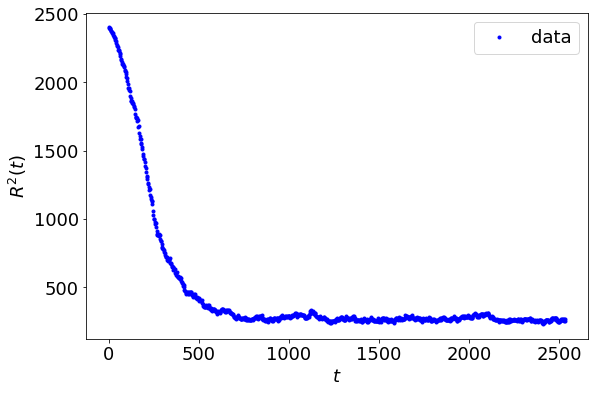

End-to-end distance in equilibrium (theory) = 146.99999999999997


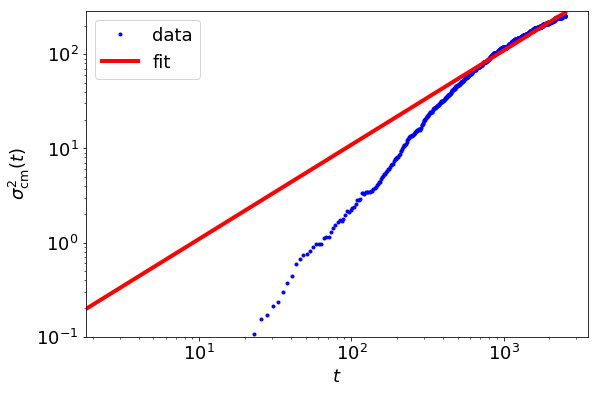

factor_sigma (simultaion)= [0.10933326]


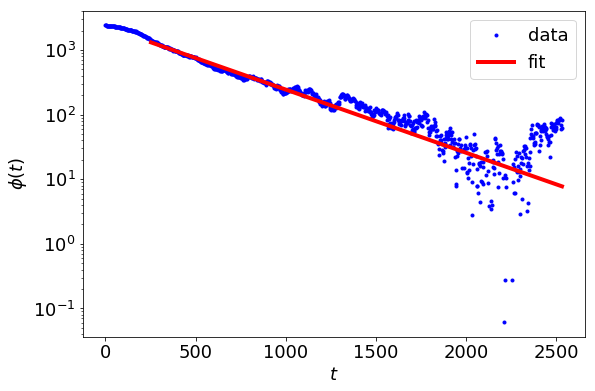

rouse time (theory) = 253.30295910584442
rouse time (simulation) = 444.34984539121155


In [12]:
%run results_representation.ipynb